# DETEC√á√ÉO DE FRAUDES EM TRANSA√á√ïES FINANCEIRAS

# Objetivo Principal do Projeto

Queremos encontrar o ponto de threshold ideal para o modelo j√° treinado apresentado √† parte (`score_fraude_modelo`, onde 0 √© o risco mais baixo e 100 o mais alto). Precisamos definir o ponto de corte que maximize os lucros da empresa, de forma que todos os pagamentos com menor Score sejam aprovados e os maiores sejam rejeitados.

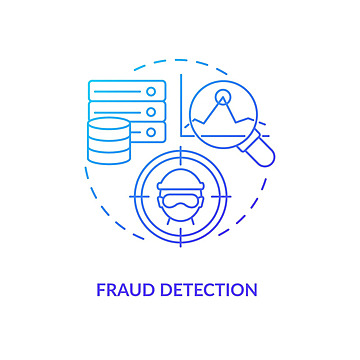

# Entendendo um pouco mais sobre fraudes em transa√ß√µes financeiras

## Import√¢ncia da Identifica√ß√£o de Fraudes
A identifica√ß√£o de transa√ß√µes fraudulentas √© uma preocupa√ß√£o central para institui√ß√µes financeiras em todo o mundo. Fraudes financeiras podem resultar em perdas significativas, afetando a lucratividade e a confian√ßa dos clientes na institui√ß√£o. A fraude ocorre quando transa√ß√µes s√£o realizadas de forma ilegal ou sem a autoriza√ß√£o adequada, e identificar esses casos √© crucial para proteger tanto os ativos financeiros da empresa quanto os de seus clientes.

## Impactos Financeiros
As transa√ß√µes fraudulentas t√™m um impacto financeiro direto e devastador. Para este projeto espec√≠fico, a institui√ß√£o financeira ganha 10% do valor de cada pagamento aprovado corretamente. No entanto, cada fraude aprovada resulta na perda de 100% do valor do pagamento. Isso significa que, para cada transa√ß√£o fraudulenta, a empresa n√£o apenas deixa de ganhar a comiss√£o de 10%, mas tamb√©m perde todo o valor transacionado. Essa din√¢mica ressalta a import√¢ncia de uma identifica√ß√£o eficaz das fraudes, pois mesmo um pequeno n√∫mero de fraudes pode rapidamente anular os lucros obtidos por muitas transa√ß√µes leg√≠timas.

## Exemplifica√ß√£o dos Impactos
Para ilustrar, considere o seguinte cen√°rio: se uma empresa aprova 100 transa√ß√µes leg√≠timas de 1.000 reais cada, ela ganha 10.000 reais (10% de 1.000 * 100). No entanto, se uma √∫nica transa√ß√£o fraudulenta de 1.000 reais for aprovada, a perda √© desse mesmo valor, anulando o ganho de 10 transa√ß√µes leg√≠timas. Portanto, a identifica√ß√£o e preven√ß√£o de fraudes s√£o fundamentais para manter a sa√∫de financeira da institui√ß√£o.



# Principais KPIs do Projeto

## KPIs de Efici√™ncia e Efic√°cia do Modelo

### Taxa de Detec√ß√£o de Fraudes (Precision)
- Descri√ß√£o: Percentual de transa√ß√µes identificadas como fraudulentas que realmente s√£o fraudes.
- F√≥rmula: (N√∫mero de Fraudes Corretamente Identificadas / N√∫mero Total de Transa√ß√µes Identificadas como Fraudes) * 100%

### Taxa de Cobertura de Fraudes (Recall)
- Descri√ß√£o: Percentual de transa√ß√µes fraudulentas identificadas corretamente pelo sistema em rela√ß√£o ao total de fraudes.
- F√≥rmula: (N√∫mero de Fraudes Corretamente Identificadas / N√∫mero Total de Fraudes) * 100

### Acur√°cia do Modelo
- Descri√ß√£o: Percentual de todas as transa√ß√µes (fraudulentas e n√£o fraudulentas) que foram classificadas corretamente.
- F√≥rmula: (N√∫mero de Transa√ß√µes Corretamente Classificadas / N√∫mero Total de Transa√ß√µes) * 100

### Taxa de Falsos Positivos
- Descri√ß√£o: Percentual de transa√ß√µes n√£o fraudulentas que foram incorretamente classificadas como fraudes.
- F√≥rmula: (N√∫mero de Falsos Positivos / N√∫mero Total de Transa√ß√µes N√£o Fraudulentas) * 100

### Taxa de Falsos Negativos
- Descri√ß√£o: Percentual de transa√ß√µes fraudulentas que n√£o foram detectadas pelo sistema.
- F√≥rmula: (N√∫mero de Falsos Negativos / N√∫mero Total de Transa√ß√µes Fraudulentas) * 100


## KPIs Financeiros

### Valor Total de Fraudes Prevenidas
- Descri√ß√£o: Quantidade de dinheiro que foi salva ao identificar e bloquear transa√ß√µes fraudulentas.
- F√≥rmula: Soma do valor de todas as transa√ß√µes fraudulentas bloqueadas

### Custo de Fraudes N√£o Detectadas
- Descri√ß√£o: Quantidade de dinheiro perdida devido a fraudes que n√£o foram identificadas e bloqueadas.
- F√≥rmula: Soma do valor de todas as transa√ß√µes fraudulentas que passaram pelo sistema

### Taxa de Fraude (Fraud Rate)
- Descri√ß√£o: Percentual de transa√ß√µes que s√£o fraudulentas em rela√ß√£o ao total de transa√ß√µes processadas.
- F√≥rmula: (N√∫mero Total de Transa√ß√µes Fraudulentas / N√∫mero Total de Transa√ß√µes) * 100

# Import das bibliotecas

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, RandomizedSearchCV, KFold, cross_val_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import roc_curve, roc_auc_score, confusion_matrix, log_loss, precision_score, recall_score, f1_score
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.base import BaseEstimator, TransformerMixin
from scipy.stats import chi2_contingency, ks_2samp, mannwhitneyu
from xgboost import XGBClassifier
import lightgbm as lgb
from imblearn.ensemble import BalancedRandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
import mlflow
import mlflow.lightgbm
from lightgbm import LGBMClassifier

import warnings
warnings.filterwarnings('ignore')

# Dicion√°rio de dados

- score_1 a score_10: s√£o notas de bureau de cr√©dito que a empresa adquiriu para identificar se o comprador √© confi√°vel ou outros dados anonimizados que n√£o temos informa√ß√£o sobre
- pais: pa√≠s de compra
- produto: produto que est√° sendo comprado no e-commerce
- categoria_produto: categoria a qual esse produto se encaixa
- entrega_doc_1 a entrega_doc_3: documentos requisitados no momento de fazer a conta. 0 = N = nao entregou. Y = 1 = entregou. Se vazio, considere que n√£o entregou
- data_compra: data e hora exata da compra registrada
- valor_compra: valor da compra registrada
- score_fraude_modelo: score dado pelo modelo atual. √â a probabilidade daquela compra ser uma fraude ou n√£o. Quanto mais pr√≥ximo de 100, maior a certeza do modelo que √© fraude
- fraude: informa√ß√£o se aquela compra era fraudulenta ou n√£o. Foi inserida ap√≥s alguns dias, para termos o feedback real se de fato era fraudulenta ou n√£o. 0 se n√£o era fraudulenta e 1 se era fraudulenta

# An√°lise Explorat√≥ria dos Dados



In [2]:
# Carregando os dados e conhecendo as features
df = pd.read_csv("../data/raw/dados.csv")
df.head()

score_1  score_2    score_3  score_4   score_5  score_6 pais  score_7  \
0        4   0.7685   94436.24     20.0  0.444828      1.0   BR        5   
1        4   0.7550    9258.50      1.0  0.000000     33.0   BR        0   
2        4   0.7455  242549.09      3.0  0.000000     19.0   AR       23   
3        4   0.7631   18923.90     50.0  0.482385     18.0   BR       23   
4        2   0.7315    5728.68     15.0  0.000000      1.0   BR        2   

                                             produto categoria_produto  \
0  M√°quininha Corta Barba Cabelo Peito Perna Pelo...       cat_8d714cd   
1  Avental Descartavel Manga Longa  - 50 Un. Tnt ...       cat_64b574b   
2  Bicicleta Mountain Fire Bird Rodado 29 Alumini...       cat_e9110c5   
3  Caneta Delineador Carimbo Olho Gatinho Longo 2...       cat_d06e653   
4           Resident Evil Operation Raccoon City Ps3       cat_6c4cfdc   

    score_8  score_9  score_10  entrega_doc_1 entrega_doc_2 entrega_doc_3  \
0  0.883598    240.0     102.0              1           NaN             N   
1  0.376019   4008.0       0.0              1             Y             N   
2  0.516368   1779.0      77.0              1           NaN             N   
3  0.154036   1704.0    1147.0              1           NaN             Y   
4  0.855798   1025.0     150.0              1           NaN             N   

           data_compra  valor_compra  score_fraude_modelo  fraude  
0  2020-03-27 11:51:16          5.64                   66       0  
1  2020-04-15 19:58:08        124.71                   72       0  
2  2020-03-25 18:13:38        339.32                   95       0  
3  2020-04-16 16:03:10          3.54                    2       0  
4  2020-04-02 10:24:45          3.53                   76       0

In [3]:
# Conhecendo a estrutura do DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 20 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   score_1              150000 non-null  int64  
 1   score_2              137016 non-null  float64
 2   score_3              137016 non-null  float64
 3   score_4              149635 non-null  float64
 4   score_5              150000 non-null  float64
 5   score_6              149989 non-null  float64
 6   pais                 149806 non-null  object 
 7   score_7              150000 non-null  int64  
 8   produto              150000 non-null  object 
 9   categoria_produto    150000 non-null  object 
 10  score_8              150000 non-null  float64
 11  score_9              149989 non-null  float64
 12  score_10             149635 non-null  float64
 13  entrega_doc_1        150000 non-null  int64  
 14  entrega_doc_2        41143 non-null   object 
 15  entrega_doc_3    

√â n√≠tido que algumas colunas tem diversos registros nulos ou NaN, que precisar√£o ser tratados ou n√£o, dependendo da estrat√©gia seguida mais pra frente. A coluna que mais chama aten√ß√£o no momento √© a `entrega_doc_2`, que tem menos de 30% dos registros preenchidos.

Como nesse caso temos especificado no Dicion√°rio de Dados que um registro vazio √© a mesma coisa que "N" (n√£o entregou), depois podemos preencher essas linhas com esse valor. Logicamente essa coluna ser√° bem desbalanceada, pois a grande maioria n√£o vai ter entregado o documento.

Outras coisas que me chamaram a aten√ß√£o foram: tanto a coluna `entrega_doc_2` quanto a `entrega_doc_3` est√£o classificadas como objetos, por terem os valores Y e N para representar se entregou ou n√£o cada documento. Podemos transform√°-las em categorias num√©ricas, seguindo o padr√£o da coluna `entrega_doc_1`, pois se formos usar no modelo, elas n√£o poder√£o ser categ√≥ricas. E por √∫ltimo, a coluna `data_compra` est√° classificada como objeto, e precisaria ser transformada em data pra n√£o termos nenhum problema.

In [4]:
# Visualizando a quantidade de valores √∫nicos por coluna
df.nunique()

score_1                     4
score_2                  7672
score_3                135090
score_4                    51
score_5                 43207
score_6                  1338
pais                       51
score_7                    59
produto                127804
categoria_produto        8324
score_8                149999
score_9                  7297
score_10                 1793
entrega_doc_1               2
entrega_doc_2               2
entrega_doc_3               2
data_compra            145813
valor_compra            17831
score_fraude_modelo       101
fraude                      2
dtype: int64

Analisando os valores √∫nicos por colunas, o que mais me preocupa √© a alta cardinalidade da coluna `produto`. S√£o mais de 127 mil produtos diferentes para 150 mil registros. √â imposs√≠vel que o modelo consiga encontrar padr√µes bem definidos nessa distribui√ß√£o, e assim n√£o conseguir√° ser generalista para novos dados.

Muitos valores distintos em vari√°veis num√©ricas n√£o √© algo t√£o problem√°tico pois poderemos criar ranges para facilitar a identifica√ß√£o de padr√µes se for necess√°rio. E no caso da coluna `data_compra`, sei que quase todos os valores s√£o diferentes pois eles tem o registro de hor√°rio junto √† data, o que pode ser facilmente resolvido atrav√©s de feature engineering, o que n√£o vai ser o caso para esse projeto, pois an√°lises temporais podem degradar o modelo com o tempo. Ent√£o na parte de pr√©-processamento eu seguirei com a exclus√£o dessa coluna.

Apesar de j√° ter visto quantos valores n√£o nulos cada coluna tem, eu quero verificar em valores percentuais a quantidade de nulos pra cada uma, tendo uma vis√£o mais clara das vari√°veis mais afetadas.

In [5]:
# Percentual de valores nulos por coluna
(df.isnull().sum() / df.shape[0] * 100).round(2).sort_values(ascending=False)

entrega_doc_2          72.57
score_2                 8.66
score_3                 8.66
score_4                 0.24
score_10                0.24
pais                    0.13
score_9                 0.01
score_6                 0.01
score_1                 0.00
produto                 0.00
score_7                 0.00
score_5                 0.00
score_8                 0.00
categoria_produto       0.00
entrega_doc_1           0.00
entrega_doc_3           0.00
data_compra             0.00
valor_compra            0.00
score_fraude_modelo     0.00
fraude                  0.00
dtype: float64

E como j√° foi citado anteriormente, `entrega_doc_2` tem a grande maioria dos seus registros nulos, mas o restante das features n√£o tem percentuais preocupantes nesse quesito.

# An√°lise Explorat√≥ria Univariada

Ap√≥s ter uma ideia geral dos dados com que estamos lidando, vamos iniciar a an√°lise univariada, selecionando primeiro as colunas de dados categ√≥ricos, e depois de dados num√©ricos.

## Vari√°veis Categ√≥ricas

Como analisado anteriormente, a coluna `score_1` s√≥ tem 4 valores √∫nicos (n√∫meros de 1 a 4), e por isso vou considerar que √© uma vari√°vel categ√≥rica.

Vamos analisar a distribui√ß√£o dos valores nessa coluna.

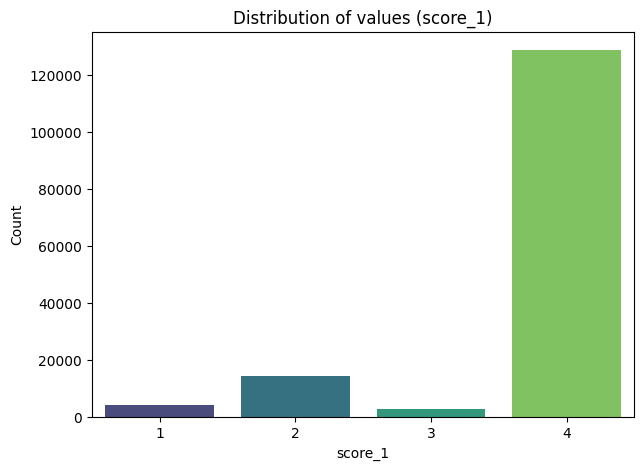

In [67]:
# Gr√°fico de distribui√ß√£o dos valores de score_1
plt.figure(figsize=(7, 5))
sns.countplot(data=df, x='score_1', palette='viridis')
plt.title('Distribution of values (score_1)')
plt.xlabel('score_1')
plt.ylabel('Count')
plt.show()

Fica claro que a maioria das pessoas est√£o concentradas no valor 4, e logo em sequ√™ncia no valor 2, podendo indicar se existe algum padr√£o referente √† essa vari√°vel que aumente a possibilidade do registro ser uma transa√ß√£o fraudulenta.

Pra visualizar melhor isso, vamos visualizar a distribui√ß√£o de fraudes classificadas por valor na coluna `score_1`.

In [7]:
# Total de fraudes no DataFrame
total_frauds = df[df['fraude'] == 1].shape[0]

# Percentual de fraudes para cada valor de score_1 em rela√ß√£o ao total de fraudes
(df[df['fraude'] == 1].groupby('score_1').size() / total_frauds * 100).round(2).sort_values(ascending=False)

score_1
4    76.39
2    14.91
1     5.27
3     3.44
dtype: float64

Como j√° era esperado, pela propor√ß√£o da distribui√ß√£o os valores 4 e 2 s√£o os que mais somam registros de fraudes. Mas pela diferen√ßa de registros entre os 4 valores poss√≠veis na coluna, os percentuais totais dos valores 1 e 3 tamb√©m ficaram altos.

Por isso, vamos analisar quantos % dos registros totais de cada valor s√£o fraudes, pra tentar encontrar um poss√≠vel padr√£o de comportamento.

In [8]:
# Percentual de registros que s√£o fraudes para cada valor da coluna
(df[df['fraude'] == 1].groupby('score_1').size() / df.groupby('score_1').size() * 100).round(2).sort_values(ascending=False)

score_1
1    9.42
3    9.06
2    7.78
4    4.46
dtype: float64

Perceba que interessante, apesar dos valores 1 e 3 serem menos significativos em total de registros no conjunto de dados, em percentual do total de registros de cada valor, s√£o os que mais cont√©m fraudes, podendo indicar um poss√≠vel padr√£o nas transa√ß√µes fraudulentas.

Agora vamos analisar a coluna `pais`.

In [9]:
# Visualizando a quantidade de registros para cada pa√≠s
df['pais'].value_counts()

pais
BR    111628
AR     31964
UY      2967
US      2273
SE       358
MX       236
RU        73
ES        69
CO        64
GB        43
FR        18
IT        14
PT        13
CL         9
DE         9
PE         5
PY         4
EC         4
AU         3
UA         3
CN         3
CA         3
BE         3
NZ         3
CH         3
PA         3
BO         2
LB         2
PR         2
NL         2
CR         2
AE         2
AD         1
GE         1
KR         1
IN         1
HN         1
NI         1
GR         1
DO         1
EG         1
TR         1
BS         1
PH         1
GH         1
TW         1
FI         1
NO         1
IL         1
JP         1
ZA         1
Name: count, dtype: int64

In [10]:
# Percentual de fraudes para cada valor de pais em rela√ß√£o ao total de fraudes
(df[df['fraude'] == 1].groupby('pais').size() / total_frauds * 100).round(2).sort_values(ascending=False)

pais
BR    82.16
AR    15.72
US     0.93
UY     0.39
SE     0.20
RU     0.08
ES     0.07
DE     0.04
FR     0.04
MX     0.04
EC     0.03
NL     0.03
CO     0.01
CL     0.01
KR     0.01
FI     0.01
PT     0.01
NZ     0.01
dtype: float64

In [11]:
# Percentual de registros que s√£o fraudes para cada valor da coluna
(df[df['fraude'] == 1].groupby('pais').size() / df.groupby('pais').size() * 100).round(2).sort_values(ascending=False)

pais
FI    100.00
KR    100.00
NL    100.00
EC     50.00
NZ     33.33
DE     33.33
FR     16.67
CL     11.11
RU      8.22
PT      7.69
ES      7.25
BR      5.52
SE      4.19
AR      3.69
US      3.08
CO      1.56
MX      1.27
UY      0.98
AD       NaN
AE       NaN
AU       NaN
BE       NaN
BO       NaN
BS       NaN
CA       NaN
CH       NaN
CN       NaN
CR       NaN
DO       NaN
EG       NaN
GB       NaN
GE       NaN
GH       NaN
GR       NaN
HN       NaN
IL       NaN
IN       NaN
IT       NaN
JP       NaN
LB       NaN
NI       NaN
NO       NaN
PA       NaN
PE       NaN
PH       NaN
PR       NaN
PY       NaN
TR       NaN
TW       NaN
UA       NaN
ZA       NaN
dtype: float64

Com essas visualiza√ß√µes, fica claro que apesar de termos registros de 51 pa√≠ses, a nossa an√°lise ser√° focada no Brasil e Argentina. Motivos:
- mais de 95% dos registros do conjunto de dados s√£o desses pa√≠ses;
- mais de 98% das transa√ß√µes fraudulentas registradas foram nesses pa√≠ses;
- alguns pa√≠ses tem pouqu√≠ssimos registros, alguns apenas 1, tornando imposs√≠vel o nosso modelo generalizar bem atrav√©s dessa feature (alguns pa√≠ses v√£o ter 100% dos seus registros como fraudes, mas isso n√£o quer dizer que toda transa√ß√£o que venha a ocorrer ser√° fraudulenta, e isso vale igualmente para pa√≠ses que n√£o tem nenhuma fraude registrada).

Sabendo disso, ser√° interessante treinar o modelo com uma cardinalidade menor, separando essa coluna em "Brasil", "Argentina" e "Outros", por exemplo.

As pr√≥ximas vari√°veis ser√£o `produto` e `categoria_produto`. A coluna de produto j√° mostrou ter uma alta cardinalidade, ent√£o preciso analisar se existe alguma possibilidade de tratamento que fa√ßa com que essa seja uma feature interessante para o treinamento do modelo, ou se ela ser√° eliminada.

In [12]:
# Visualizando a quantidade de registros para cada produto
df['produto'].value_counts()

produto
Fone De Ouvido Sem Fio Xiaomi Airdots Preto                     83
Xiaomi Redmi Note 8 Dual Sim 64 Gb Azul-netuno 4 Gb Ram         51
Clean Sept - √Ålcool Em Gel 70% 500 Ml                           49
Tapete Ilustrativo Pista Carrinho Hot Wheels 0,60x1,20m         47
M√°scara Descart√°vel Tripla Com El√°stico Prote√ß√£o Anvisa 50un    47
                                                                ..
Escova Dental Curaprox 5460 Ultra Soft Com 3 Unidades            1
Gamepad Joystick Para Telefono Celular Android Bluetooth Cuo     1
Soldadora Inverter 180 A + M√°scara + 2 Esc. Mag 4¬¥ Kroner        1
Tripa Para Fazer Lingui√ßa - 45 Metros Long Short                 1
Corpinho Avulso Joseph, Josepha Ou Placa Sem Sexo                1
Name: count, Length: 127804, dtype: int64

Somente essa visualiza√ß√£o j√° nos diz muito, visto que o produto que mais tem registros aparece somente 83 vezes, e isso representa 0,05% do dataset. Ou seja, devido √† alta cardinalidade irei excluir essa coluna na parte de pr√©-processamento.

In [13]:
# Visualizando a quantidade de registros para cada categoria de produto
df['categoria_produto'].value_counts()

categoria_produto
cat_43b9c10    2331
cat_d69bed9    1799
cat_604df77    1784
cat_6c4cfdc    1449
cat_4249bd8    1191
               ... 
cat_805739b       1
cat_9c506bd       1
cat_ef38976       1
cat_c029284       1
cat_07b5ae2       1
Name: count, Length: 8324, dtype: int64

In [14]:
# Conferindo novamente quantas categorias diferentes existem no dataset
df['categoria_produto'].nunique()

8324

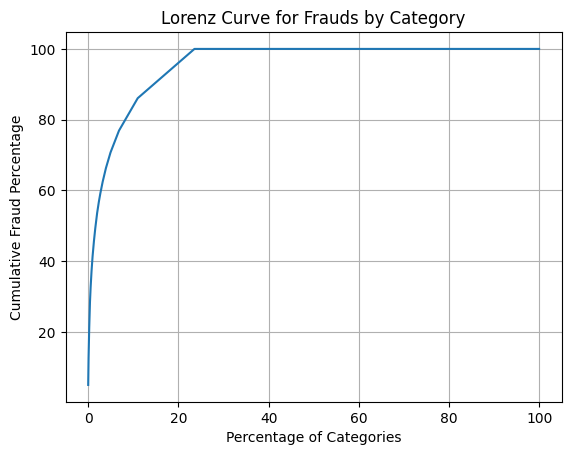

categoria_produto  fraude  percent_cumsum_fraude  \
0          cat_43b9c10     380               5.066667   
1          cat_d9753d4     115               6.600000   
2          cat_4249bd8      98               7.906667   
3          cat_8ef7164      81               8.986667   
4          cat_6c4cfdc      74               9.973333   
...                ...     ...                    ...   
8319       cat_da1353e       0             100.000000   
8320       cat_795e028       0             100.000000   
8321       cat_805739b       0             100.000000   
8322       cat_5dac1f2       0             100.000000   
8323       cat_1700264       0             100.000000   

      percent_cumsum_categoria  
0                     0.000000  
1                     0.012013  
2                     0.024027  
3                     0.036040  
4                     0.048054  
...                        ...  
8319                 99.939933  
8320                 99.951946  
8321                 99.963960  
8322                 99.975973  
8323                 99.987987  

[8324 rows x 4 columns]

50% das fraudes est√£o acumuladas em aproximadamente 1.62% das categorias
80% das fraudes est√£o acumuladas em aproximadamente 8.22% das categorias
85% das fraudes est√£o acumuladas em aproximadamente 10.46% das categorias


In [68]:
# Contagem de itens por categoria
item_per_category = df.categoria_produto.value_counts().reset_index().rename(columns={"index": "categoria_produto", 0: "counter"})

# Soma de fraudes por categoria
fraud_per_category = df.groupby(['categoria_produto']).fraude.sum().reset_index()

# Merge dos dataframes
df_item_fraud = pd.merge(item_per_category, fraud_per_category, on='categoria_produto', how="left")

# Ordenar pelo n√∫mero de fraudes em ordem decrescente
df_item_fraud = df_item_fraud.sort_values(by='fraude', ascending=False).reset_index(drop=True)

# C√°lculo da porcentagem cumulativa de fraudes
df_item_fraud['percent_cumsum_fraude'] = df_item_fraud['fraude'].cumsum() / df.fraude.sum() * 100

# C√°lculo da porcentagem cumulativa de categorias
df_item_fraud['percent_cumsum_categoria'] = df_item_fraud.index / len(df_item_fraud) * 100

# Plot da curva de Lorenz
plt.plot(df_item_fraud['percent_cumsum_categoria'], df_item_fraud['percent_cumsum_fraude'])
plt.xlabel('Percentage of Categories')
plt.ylabel('Cumulative Fraud Percentage')
plt.title('Lorenz Curve for Frauds by Category')
plt.grid(True)
plt.show()

# Exibir a tabela com as porcentagens
display(df_item_fraud[['categoria_produto', 'fraude', 'percent_cumsum_fraude', 'percent_cumsum_categoria']])

# Encontrar os pontos exatos
acumulated_frauds = [50, 80, 85]  # Exemplo de pontos de interesse

for perc in acumulated_frauds:
    num_categorias = df_item_fraud[df_item_fraud['percent_cumsum_fraude'] <= perc]['percent_cumsum_categoria'].max()
    print(f"{perc}% das fraudes est√£o acumuladas em aproximadamente {num_categorias:.2f}% das categorias")

Com as an√°lises acima, vimos que a cardinalidade da coluna `categoria_produto` √© muito menor que a de produto, e que menos de 11% de todas as categorias representam 85% das fraudes registradas, o que ajuda bastante na generaliza√ß√£o futura do modelo treinado.

Agora analisarei as 3 colunas de entrega de documentos. Como j√° foi visto anteriormente, todas as 3 colunas s√£o booleanas, mas representadas com padr√µes diferentes.

Consideramos para este projeto que **0 = N = valor nulo = nao entregou**, assim como **Y = 1 = entregou**.

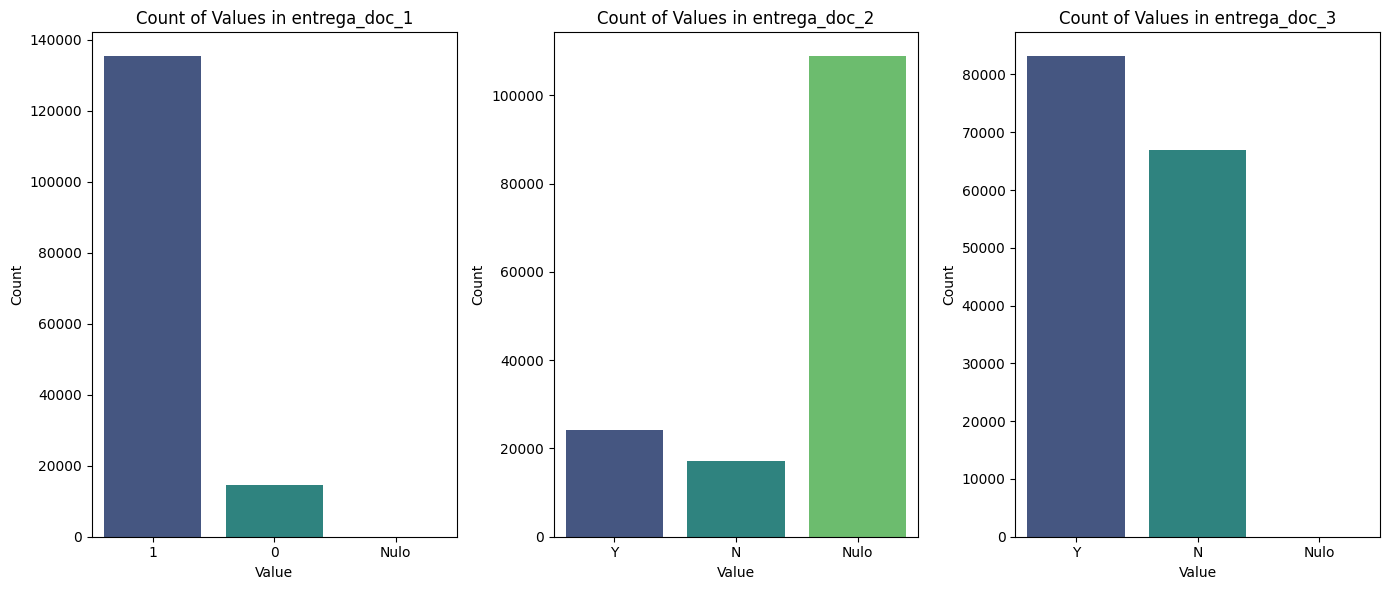

In [69]:
# Lista das colunas de entrega
doc_delivery_cols = ['entrega_doc_1', 'entrega_doc_2', 'entrega_doc_3']

# Configura√ß√£o da figura para os gr√°ficos de barras
plt.figure(figsize=(14, 6))

# Cria√ß√£o dos gr√°ficos de barras
for i, col in enumerate(doc_delivery_cols, 1):
    plt.subplot(1, 3, i)
    col_count = df[col].value_counts(dropna=False)
    null_count = col_count.loc[col_count.index.isnull()].sum() if col_count.index.isnull().any() else 0
    col_count = col_count[col_count.index.notnull()]
    col_count['Nulo'] = null_count
    sns.barplot(x=col_count.index.astype(str), y=col_count.values, palette='viridis')
    plt.title(f'Count of Values in {col}')
    plt.xlabel('Value')
    plt.ylabel('Count')

# Ajuste da figura para evitar sobreposi√ß√£o
plt.tight_layout()
plt.show()

Com esses gr√°ficos √© poss√≠vel verificar a distribui√ß√£o dos valores em cada coluna, entendendo suas diferen√ßas de valores e representa√ß√µes (o que est√° como 1 em uma coluna est√° como Y nas outras, e tamb√©m a grande quantidade de nulos em `entrega_doc_2`, que ser√£o considerados como n√£o entregues).

Pra finalizar a parte de an√°lise das vari√°veis categ√≥ricas, vamos entender como nossa vari√°vel target est√° ditribu√≠da.

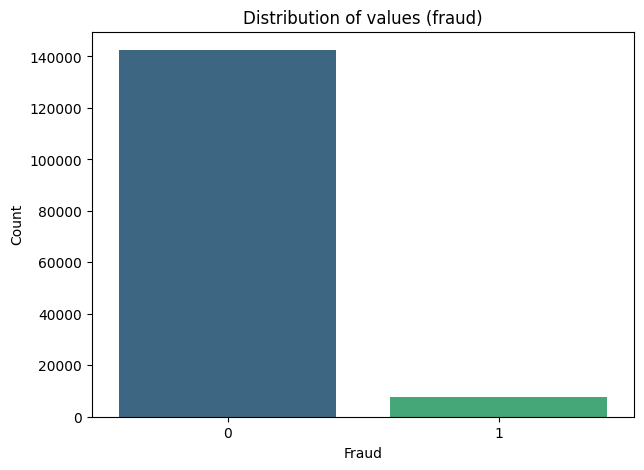

In [70]:
# Gr√°fico de distribui√ß√£o dos valores de fraude
plt.figure(figsize=(7, 5))
sns.countplot(data=df, x='fraude', palette='viridis')
plt.title('Distribution of values (fraud)')
plt.xlabel('Fraud')
plt.ylabel('Count')
plt.show()

In [18]:
# Percentual de fraude e n√£o fraudes
df['fraude'].value_counts(normalize=True) * 100

fraude
0    95.0
1     5.0
Name: proportion, dtype: float64

Como √© esperado, o dataset √© desbalanceado em rela√ß√£o √† vari√°vel target, o que exige um balanceamento para treinamento do modelo que ser√° criado.

## Vari√°veis Num√©ricas

Para iniciar a an√°lise das vari√°veis num√©ricas, vamos visualizar algumas estat√≠sticas.

In [19]:
df.describe()

score_1        score_2       score_3        score_4  \
count  150000.000000  137016.000000  1.370160e+05  149635.000000   
mean        3.705407       0.728115  2.604451e+05      21.677669   
std         0.753206       0.132943  8.464361e+05      20.062146   
min         1.000000       0.000000  1.600000e-01       0.000000   
25%         4.000000       0.678400  9.679915e+03       2.000000   
50%         4.000000       0.755500  4.371165e+04      14.000000   
75%         4.000000       0.806500  1.454436e+05      50.000000   
max         4.000000       1.000000  1.387874e+07      50.000000   

             score_5        score_6        score_7        score_8  \
count  150000.000000  149989.000000  150000.000000  150000.000000   
mean        0.220641      51.169352      14.193513       0.497532   
std         2.434995     709.472904      14.161216       0.288348   
min         0.000000      -5.000000       0.000000       0.000004   
25%         0.000000       1.000000       3.000000       0.246819   
50%         0.104875       8.000000       9.000000       0.495990   
75%         0.282938      33.000000      21.000000       0.746508   
max       833.333333  145274.000000      58.000000       0.999995   

             score_9       score_10  entrega_doc_1   valor_compra  \
count  149989.000000  149635.000000  150000.000000  150000.000000   
mean     2305.409403     299.969579       0.902353      43.523134   
std      1712.379601     321.075806       0.296837      91.557888   
min         0.000000       0.000000       0.000000       0.020000   
25%       910.000000      42.000000       1.000000       9.380000   
50%      1937.000000     193.000000       1.000000      20.610000   
75%      3445.000000     459.000000       1.000000      40.692500   
max      7544.000000    2225.000000       1.000000    3696.350000   

       score_fraude_modelo         fraude  
count        150000.000000  150000.000000  
mean             48.066240       0.050000  
std              28.995122       0.217946  
min               0.000000       0.000000  
25%              23.000000       0.000000  
50%              48.000000       0.000000  
75%              73.000000       0.000000  
max             100.000000       1.000000

O que mais me chama a aten√ß√£o inicialmente s√£o as diferen√ßas muito grandes entre os valores m√°ximos em rela√ß√£o √†s m√©dias e aos terceiros quartis (75%) de algumas vari√°veis, como `score_5`, `score_6` e `valor_compra` por exemplo. Isso demonstra que existem outliers sim, mas ainda n√£o tenho certeza se vou elimin√°-los.



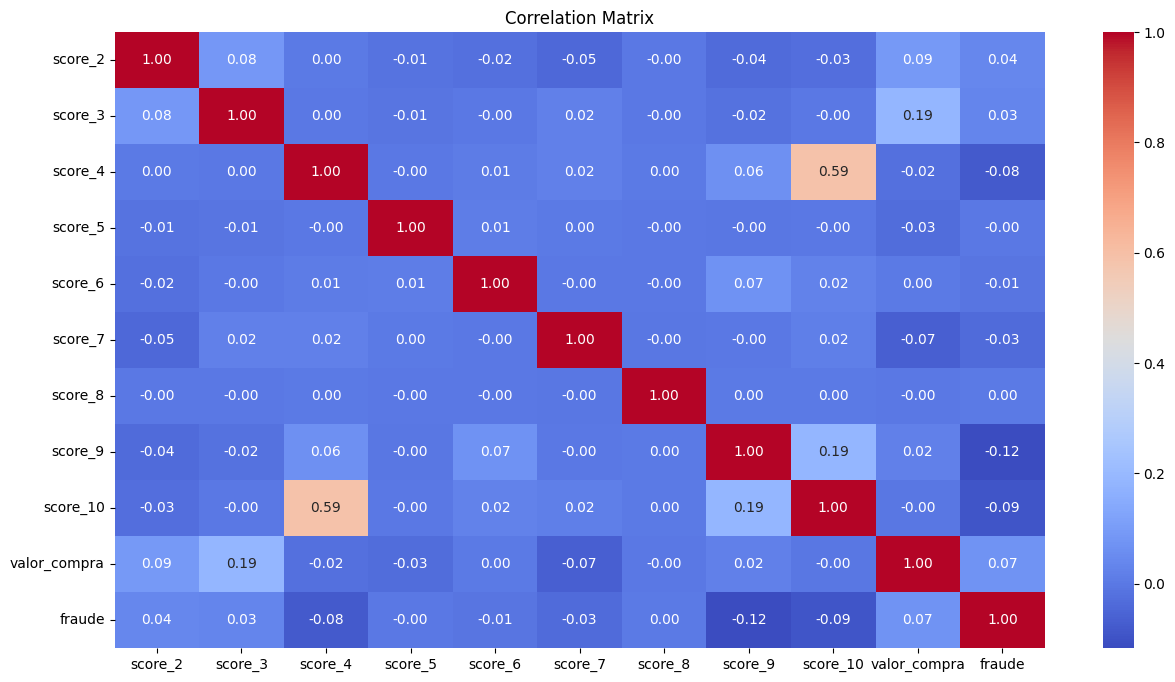

In [71]:
# Plotando uma matriz de correla√ß√£o entre as vari√°veis num√©ricas
corr = df[['score_2', 'score_3', 'score_4', 'score_5', 'score_6', 'score_7', 'score_8', 'score_9', 'score_10', 'valor_compra', 'fraude']].corr()
plt.figure(figsize = (15, 8))
sns.heatmap(corr, annot = True, cmap = 'coolwarm', fmt = '.2f')
plt.title('Correlation Matrix')
plt.show()

Existe uma correla√ß√£o positiva de 0.59 entre os scores 4 e 10, que n√£o √© uma correla√ß√£o forte, ent√£o n√£o vou excluir nenhuma feature nesse caso.

Logo de in√≠cio j√° temos um grande grupo de colunas de score (menos o `score_1` que foi considerado como vari√°vel categ√≥rica).

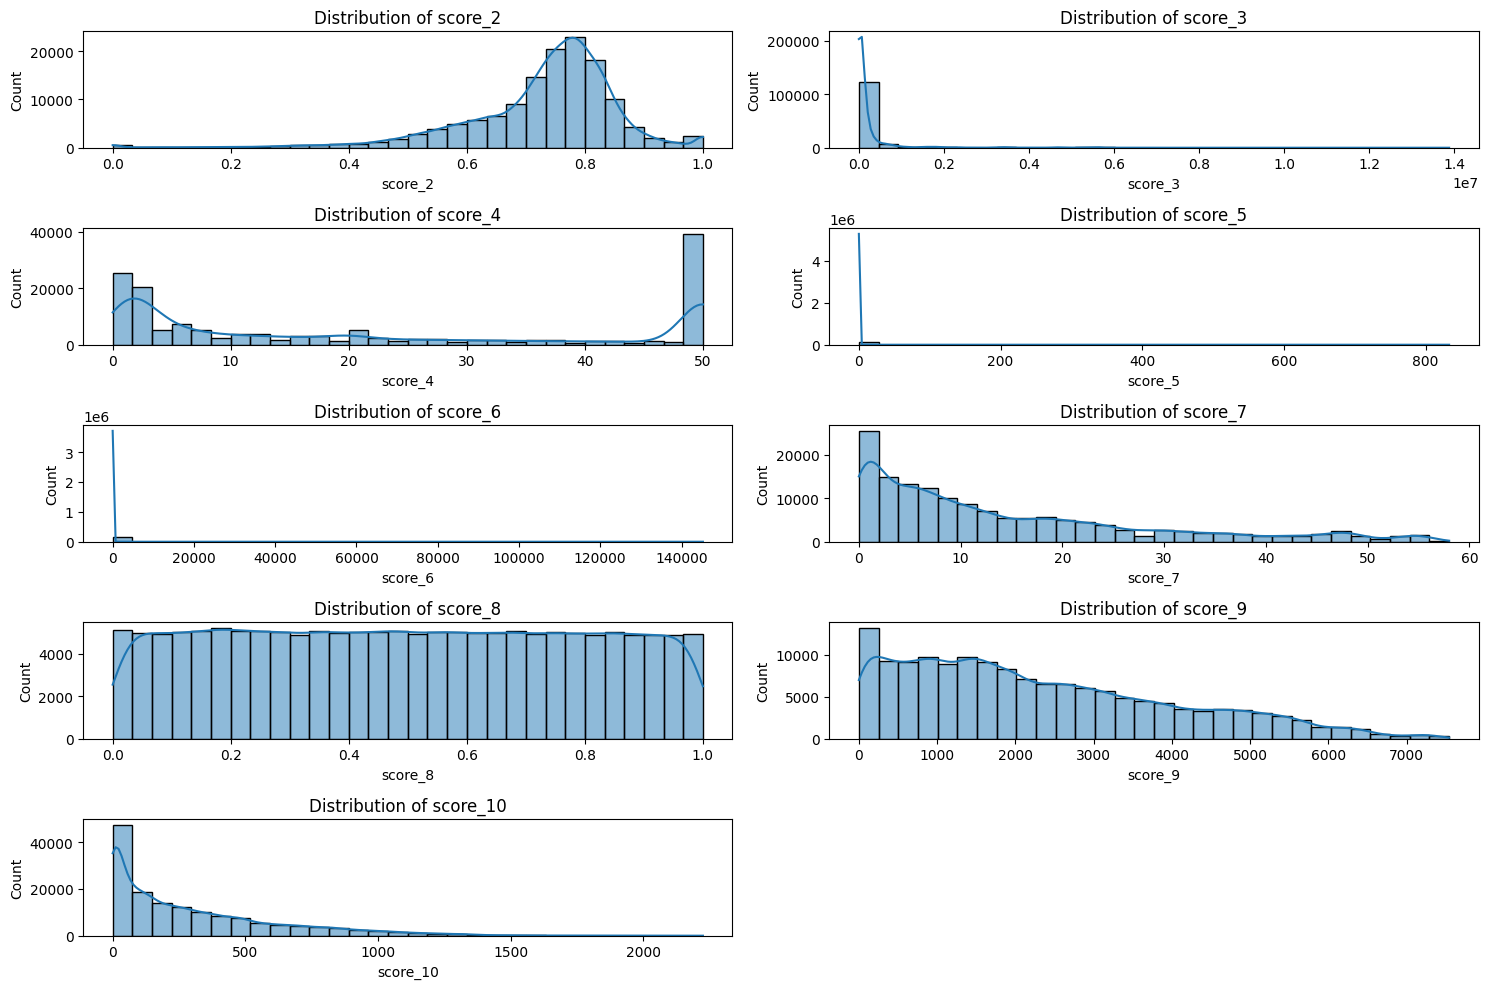

In [21]:
# Selecionando as colunas que quero entender melhor sobre a ditribui√ß√£o
score_columns = ['score_2', 'score_3', 'score_4', 'score_5', 'score_6', 'score_7', 'score_8', 'score_9', 'score_10']

# Plotando histogramas
plt.figure(figsize=(15, 10))
for i, col in enumerate(score_columns, 1):
    plt.subplot(5, 2, i)
    sns.histplot(df[col], bins=30, kde=True)
    plt.title(f'Distribution of {col}')

plt.tight_layout()
plt.show()

Verificando os histogramas, √© bem percept√≠vel que os dados das colunas de score n√£o est√£o na mesma escala e nem no formato de uma distribui√ß√£o normal.

Cada score acaba variando bastante:
- `score_2` tem uma cauda √† esquerda (concentra√ß√£o maior de valores √† direita);
- `score_4` segue uma distribui√ß√£o bimodal (dois picos nas duas extremidades nesse caso);
- `score_3`, `score_5`, `score_7`, `score_9` e `score_10` tem uma cauda √† direita (concentra√ß√£o maior de valores √† esquerda);
- `score_8` √© o que mais me chama a aten√ß√£o, com uma distribui√ß√£o uniforme, o que √© p√©ssimo para o modelo que iremos construir, visto que os dados n√£o tem quase nenhuma varia√ß√£o, sendo muito dif√≠cil de identificar um padr√£o de comportamento baseado nessa vari√°vel.


Na parte de tratamento dos dados, provavelmente irei eliminar o `score_8` pelo motivo citado acima. Referente √†s outras colunas de score, como n√£o sabemos exatamente o que cada uma representa, por estarem anonimizadas, fica um pouco mais complicado de ter certeza se valores muito acima ou abaixo da m√©dia ser√£o outliers imposs√≠veis de ocorrer em uma situa√ß√£o real, e por isso vou mant√™-los posteriormente.

Agora vou verificar a distribui√ß√£o dos valores de compra, pra entender se existe algum padr√£o ou comportamento significativo no conjunto de dados.

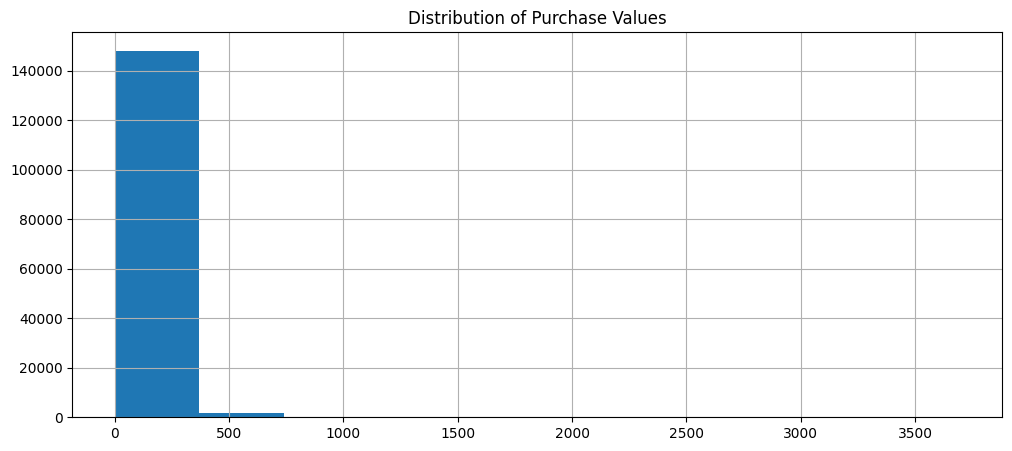

In [72]:
# Gr√°fico de distribui√ß√£o dos valores de compra
fig, ax = plt.subplots(figsize = (12, 5))
ax.set_title('Distribution of Purchase Values')
df['valor_compra'].hist(ax = ax);

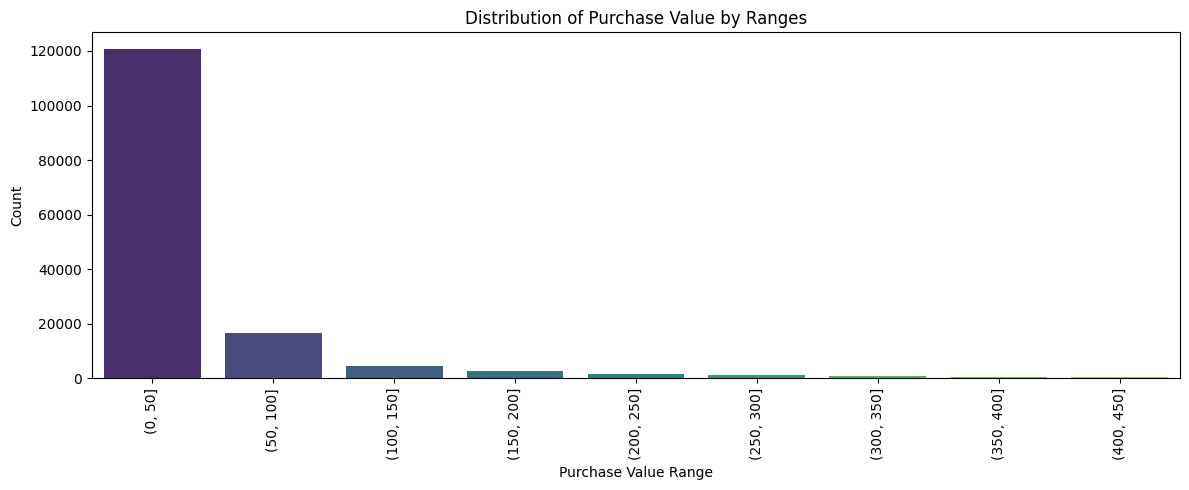

In [73]:
# Definir as faixas para os valores de compra
bins = range(0, 500, 50)

# Contar os valores em cada faixa
range_count = pd.cut(df['valor_compra'], bins).value_counts().sort_index()

# Plotar o gr√°fico de barras
plt.figure(figsize=(12, 5))
sns.barplot(x=range_count.index.astype(str), y=range_count.values, palette='viridis')
plt.xticks(rotation=90)
plt.title('Distribution of Purchase Value by Ranges')
plt.xlabel('Purchase Value Range')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

Com os gr√°ficos acima foi poss√≠vel perceber que a maioria das compras foi com menos de 150 d√≥lares, o que torna os valores pr√≥ximos de 3700, outliers suspeitos.

# An√°lise Explorat√≥ria Bivariada

Ao explorar as vari√°veis de maneira univariada, fui pensando em algumas hip√≥teses que podem ser testadas. Como n√£o temos muitas colunas no dataset, irei separar elas em grupos e verificar se existe alguma rela√ß√£o entre cada coluna com a vari√°vel target. Com isso, temos as seguinte hip√≥teses:
- Existe alguma rela√ß√£o entre as vari√°veis de score e fraude?
- Existe alguma rela√ß√£o entre pa√≠s e fraude?
- Existe alguma rela√ß√£o entre as entregas de documentos e fraude?
- Existe alguma rela√ß√£o entre a data da compra e fraude?
- Existe alguma rela√ß√£o entre o valor da compra e fraude?

Vou iniciar com um pairplot para tentar visualizar algum padr√£o nos casos de fraude, em rela√ß√£o √†s outras colunas.

In [24]:
df_subset = df[['score_3', 'score_5', 'score_6', 'score_9', 'entrega_doc_1', 'valor_compra', 'fraude']].copy()

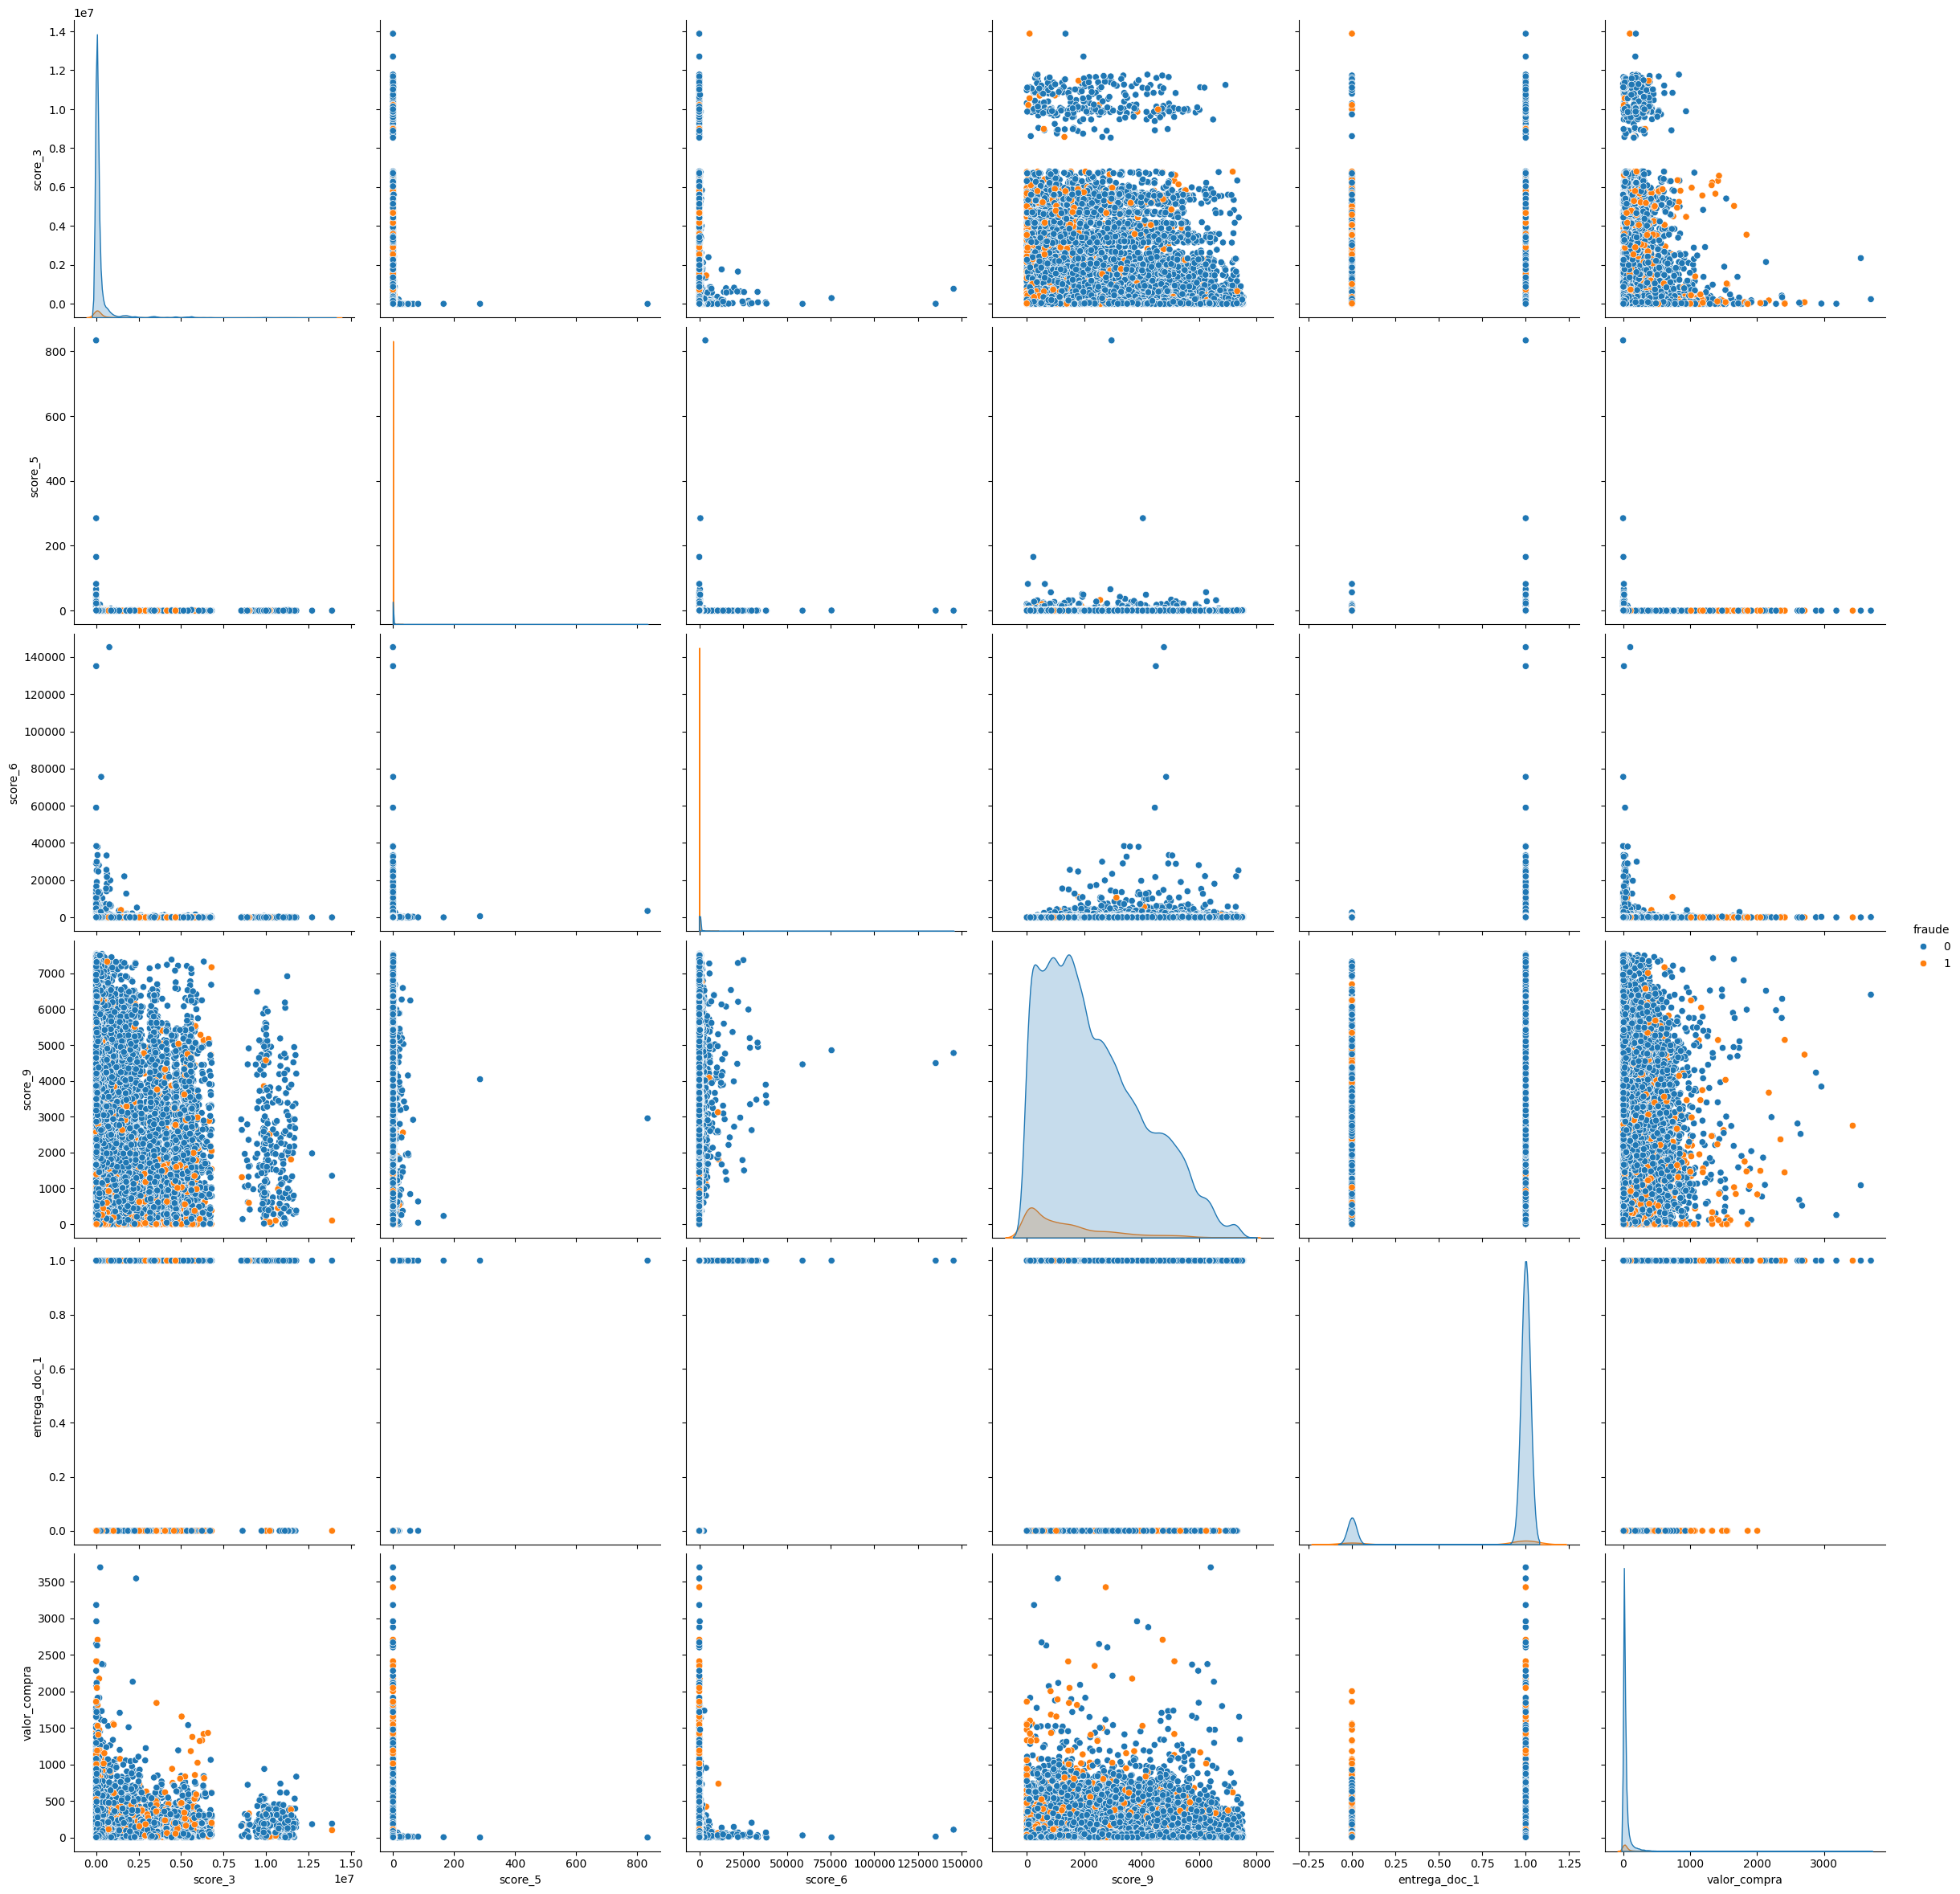

In [25]:
# Gerando os gr√°ficos de dispers√£o
sns.pairplot(df_subset, hue = 'fraude', height = 4)
plt.show()

Pelo pairplot n√£o foi poss√≠vel identificar nenhuma rela√ß√£o significativa entre fraude e valores determinados de alguma vari√°vel.

Ent√£o vou tentar encontrar alguma rela√ß√£o entre as vari√°veis de score com a target. Como eu j√° visualizei as distribui√ß√µes de valores para cada vari√°vel anteriormente, agora vou focar nos testes de hip√≥tese, iniciando com o `score_1` por ser categ√≥rico, e depois partindo para os outros scores.

In [26]:
# Criando uma tabela de conting√™ncia
contingency_table = pd.crosstab(df['score_1'], df['fraude'])

# Executando o teste Qui-Quadrado
chi2, p, dof, expected = chi2_contingency(contingency_table)

# Exibindo os resultados
print("Estat√≠stica Qui-Quadrado:", chi2)
print("P-valor:", p)
print("Graus de liberdade:", dof)
print("Tabela Esperada:")
print(expected)

# Verificando a hip√≥tese nula
alpha = 0.05
if p < alpha:
    print("Rejeitamos a hip√≥tese nula: Existe uma rela√ß√£o significativa entre 'score_1' e 'fraude'.")
else:
    print("N√£o rejeitamos a hip√≥tese nula: N√£o h√° evid√™ncia suficiente para afirmar que 'score_1' e 'fraude' est√£o relacionados.")

Estat√≠stica Qui-Quadrado: 584.4465798546843
P-valor: 2.371872621590785e-126
Graus de liberdade: 3
Tabela Esperada:
[[  3985.25    209.75]
 [ 13659.1     718.9 ]
 [  2705.6     142.4 ]
 [122150.05   6428.95]]
Rejeitamos a hip√≥tese nula: Existe uma rela√ß√£o significativa entre 'score_1' e 'fraude'.


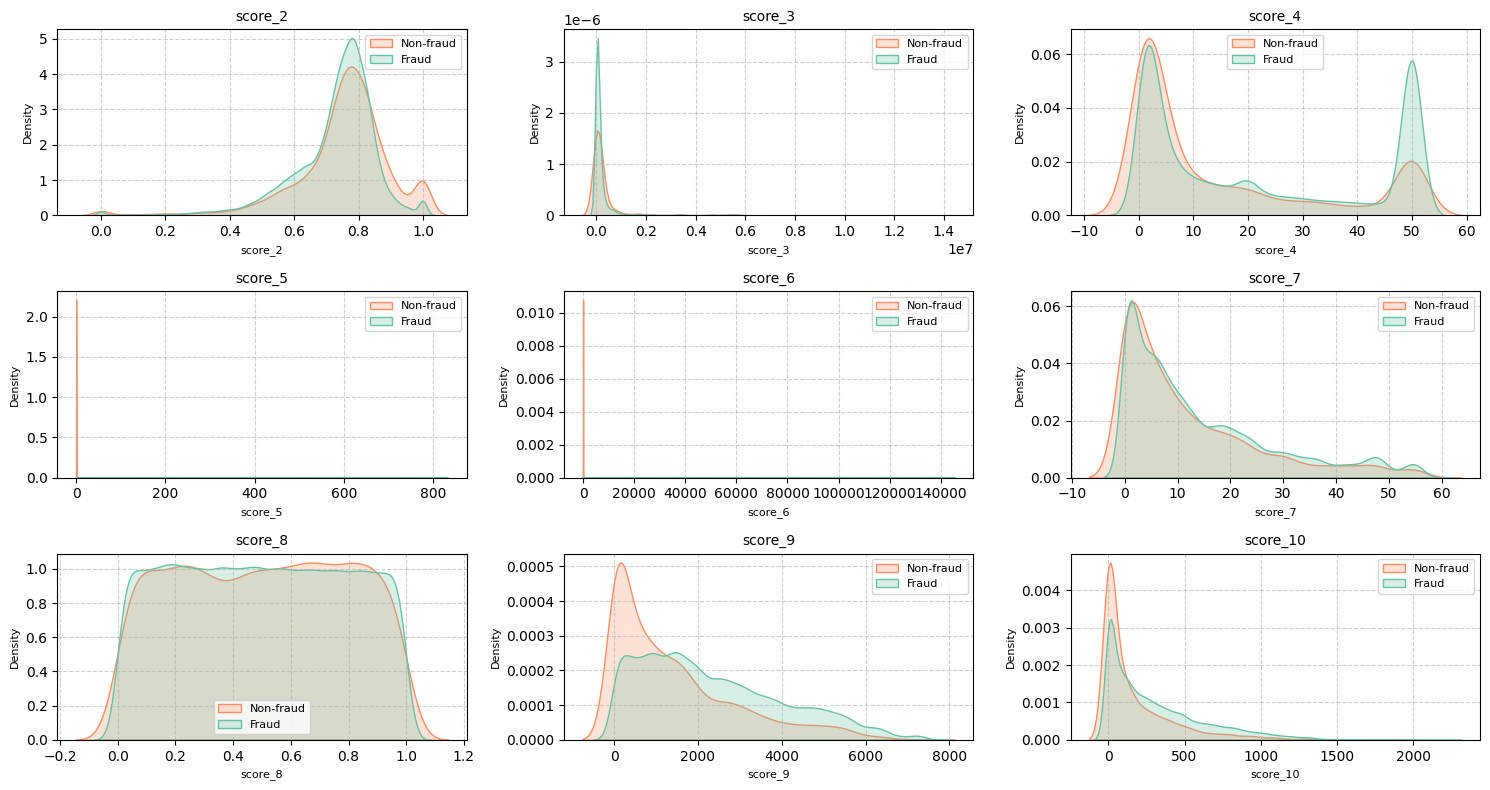

In [74]:
# Criando uma grade de subplots
fig, axes = plt.subplots(nrows=(len(score_columns) + 2) // 3, ncols=3, figsize=(15, 8))
axes = axes.flatten()

# Criando gr√°ficos de densidade para cada vari√°vel
for i, col in enumerate(score_columns):
    sns.kdeplot(data=df, x=col, hue='fraude', common_norm=False, fill=True, palette="Set2", ax=axes[i])
    axes[i].set_title(f'{col}', fontsize=10)
    axes[i].set_xlabel(col, fontsize=8)
    axes[i].set_ylabel('Density', fontsize=8)
    axes[i].legend(labels=["Non-fraud", "Fraud"], fontsize=8)
    axes[i].grid(visible=True, linestyle='--', alpha=0.6)

# Removendo eixos extras
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

In [28]:
# Iterar sobre as vari√°veis num√©ricas e realizar o teste KS
for col in score_columns:
    # Removendo valores nulos antes do teste
    data_fraud = df[df['fraude'] == 1][col].dropna()
    data_not_fraud = df[df['fraude'] == 0][col].dropna()
    
    # Verificando se ambas as amostras possuem valores suficientes
    if len(data_fraud) < 2 or len(data_not_fraud) < 2:
        print(f"Vari√°vel: {col}")
        print("Teste KS n√£o pode ser realizado: uma das amostras tem menos de 2 valores.\n")
        continue

    # Teste KS
    ks_stat, p_value = ks_2samp(data_fraud, data_not_fraud)
    
    # Exibindo os resultados
    print(f"Vari√°vel: {col}")
    print(f"Estat√≠stica KS: {ks_stat:.4f}")
    print(f"P-Valor: {p_value:.4f}")
    
    # Verificando hip√≥tese nula
    alpha = 0.05
    if p_value < alpha:
        print("Rejeitamos a hip√≥tese nula: H√° diferen√ßa significativa entre os grupos.\n")
    else:
        print("N√£o rejeitamos a hip√≥tese nula: N√£o h√° evid√™ncia suficiente para afirmar diferen√ßa entre os grupos.\n")

Vari√°vel: score_2
Estat√≠stica KS: 0.1038
P-Valor: 0.0000
Rejeitamos a hip√≥tese nula: H√° diferen√ßa significativa entre os grupos.

Vari√°vel: score_3
Estat√≠stica KS: 0.0506
P-Valor: 0.0000
Rejeitamos a hip√≥tese nula: H√° diferen√ßa significativa entre os grupos.

Vari√°vel: score_4
Estat√≠stica KS: 0.1664
P-Valor: 0.0000
Rejeitamos a hip√≥tese nula: H√° diferen√ßa significativa entre os grupos.

Vari√°vel: score_5
Estat√≠stica KS: 0.0844
P-Valor: 0.0000
Rejeitamos a hip√≥tese nula: H√° diferen√ßa significativa entre os grupos.

Vari√°vel: score_6
Estat√≠stica KS: 0.2778
P-Valor: 0.0000
Rejeitamos a hip√≥tese nula: H√° diferen√ßa significativa entre os grupos.

Vari√°vel: score_7
Estat√≠stica KS: 0.0857
P-Valor: 0.0000
Rejeitamos a hip√≥tese nula: H√° diferen√ßa significativa entre os grupos.

Vari√°vel: score_8
Estat√≠stica KS: 0.0122
P-Valor: 0.2407
N√£o rejeitamos a hip√≥tese nula: N√£o h√° evid√™ncia suficiente para afirmar diferen√ßa entre os grupos.

Vari√°vel: score_9
Estat

Para quase todos os scores n√≥s rejeitamos a hip√≥tese nula, demonstrando que existe uma rela√ß√£o ou diferen√ßa significativa entre as vari√°veis e o fato de ser fraude ou n√£o. Quase todos pois apenas para o `score_8` n√£o rejeitamos a hip√≥tese nula, visto que a distribui√ß√£o de valores para fraude e n√£o fraude s√£o muito parecidos, como j√° t√≠nhamos verificado anteriormente, o que comprova que essa n√£o √© uma feature interessante para ser usada no treinamento do modelo.

Agora vou verificar a hip√≥tese nula para a rela√ß√£o entre pa√≠s e fraude.

In [29]:
# Criando uma tabela de conting√™ncia
contingency_table = pd.crosstab(df['pais'], df['fraude'])

# Executando o teste Qui-Quadrado
chi2, p, dof, expected = chi2_contingency(contingency_table)

# Exibindo os resultados
print("Estat√≠stica Qui-Quadrado:", chi2)
print("P-valor:", p)
print("Graus de liberdade:", dof)

# Verificando a hip√≥tese nula
alpha = 0.05
if p < alpha:
    print("Rejeitamos a hip√≥tese nula: Existe uma rela√ß√£o significativa entre 'pais' e 'fraude'.")
else:
    print("N√£o rejeitamos a hip√≥tese nula: N√£o h√° evid√™ncia suficiente para afirmar que 'pais' e 'fraude' est√£o relacionados.")

Estat√≠stica Qui-Quadrado: 435.0414968257157
P-valor: 7.757972296868586e-63
Graus de liberdade: 50
Rejeitamos a hip√≥tese nula: Existe uma rela√ß√£o significativa entre 'pais' e 'fraude'.


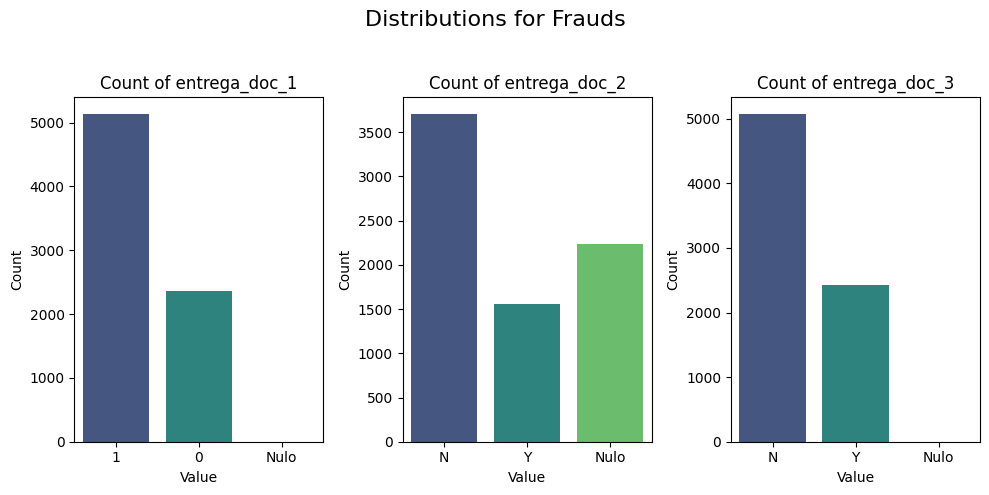

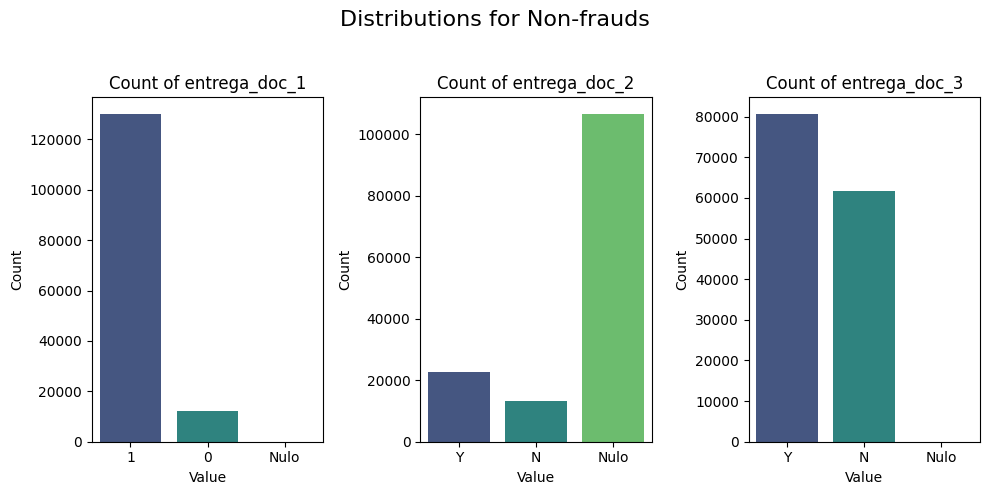

In [76]:
# Criando figuras separadas para fraudes e n√£o fraudes
for label, subset in [('Frauds', df[df['fraude'] == 1]), ('Non-frauds', df[df['fraude'] == 0])]:
    # Configura√ß√£o da figura para os gr√°ficos de barras
    plt.figure(figsize=(10, 5))
    plt.suptitle(f'Distributions for {label}', fontsize=16)
    
    # Cria√ß√£o dos gr√°ficos de barras
    for i, col in enumerate(doc_delivery_cols, 1):
        plt.subplot(1, len(doc_delivery_cols), i)
        contagem = subset[col].value_counts(dropna=False)
        nulos = contagem.loc[contagem.index.isnull()].sum() if contagem.index.isnull().any() else 0
        contagem = contagem[contagem.index.notnull()]
        contagem['Nulo'] = nulos
        sns.barplot(x=contagem.index.astype(str), y=contagem.values, palette='viridis')
        plt.title(f'Count of {col}')
        plt.xlabel('Value')
        plt.ylabel('Count')
    
    # Ajuste da figura
    plt.tight_layout(rect=[0, 0, 1, 0.95])
    plt.show()

Com essa visualiza√ß√£o √© interessante perceber um comportamento referente ao doc 3. Na distribui√ß√£o de fraudes, o dobro de pessoas n√£o entregaram o documento em compara√ß√£o com as que entregaram. Na distribui√ß√£o de n√£o fraudes essa coluna √© um pouco mais balanceada, e √© o contr√°rio que ocorre, com mais pessoas entregando o documento.

In [31]:
# Iterar sobre as colunas de entrega
for col in doc_delivery_cols:
    # Criando uma tabela de conting√™ncia
    contingency_table = pd.crosstab(df[col], df['fraude'])

    # Executando o teste Qui-Quadrado
    chi2, p, dof, expected = chi2_contingency(contingency_table)

    # Exibindo os resultados
    print(f"\nColuna: {col}")
    print("Estat√≠stica Qui-Quadrado:", chi2)
    print("P-valor:", p)
    print("Graus de liberdade:", dof)

    # Verificando a hip√≥tese nula
    alpha = 0.05
    if p < alpha:
        print("Rejeitamos a hip√≥tese nula: Existe uma rela√ß√£o significativa entre a coluna e 'fraude'.")
    else:
        print("N√£o rejeitamos a hip√≥tese nula: N√£o h√° evid√™ncia suficiente para afirmar que a coluna e 'fraude' est√£o relacionadas.")


Coluna: entrega_doc_1
Estat√≠stica Qui-Quadrado: 4217.317158934374
P-valor: 0.0
Graus de liberdade: 1
Rejeitamos a hip√≥tese nula: Existe uma rela√ß√£o significativa entre a coluna e 'fraude'.

Coluna: entrega_doc_2
Estat√≠stica Qui-Quadrado: 2093.9742824255336
P-valor: 0.0
Graus de liberdade: 1
Rejeitamos a hip√≥tese nula: Existe uma rela√ß√£o significativa entre a coluna e 'fraude'.

Coluna: entrega_doc_3
Estat√≠stica Qui-Quadrado: 1709.9413003678396
P-valor: 0.0
Graus de liberdade: 1
Rejeitamos a hip√≥tese nula: Existe uma rela√ß√£o significativa entre a coluna e 'fraude'.


Agora eu vou analisar se existe alguma rela√ß√£o entre os dados temporais que temos no dataframe com a vari√°vel target.

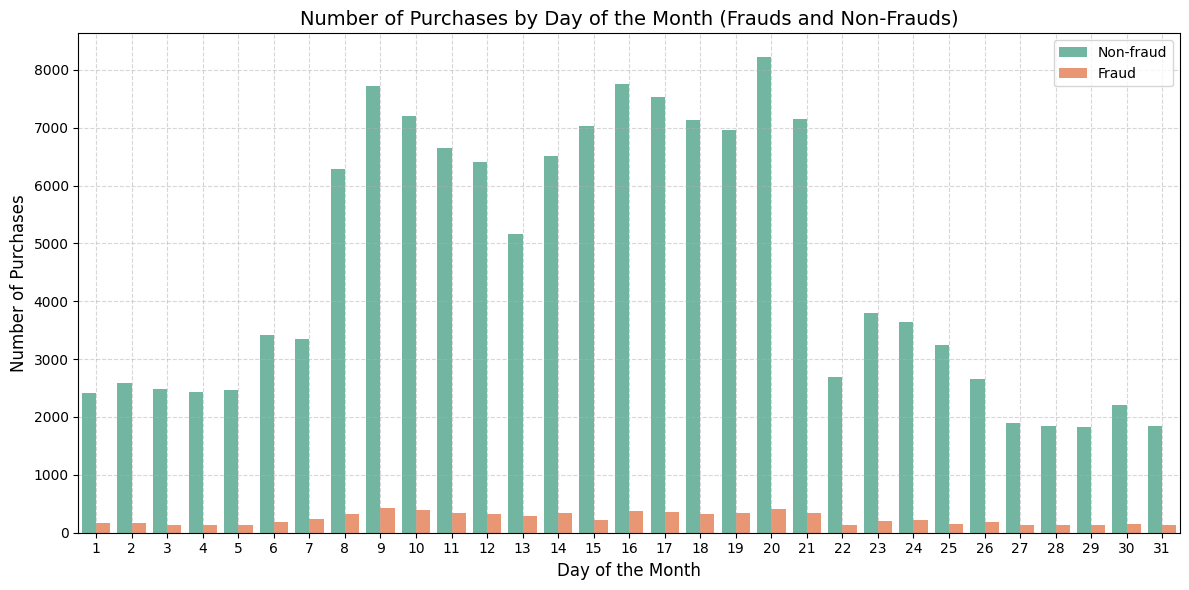

In [77]:
# Extraindo os dias do m√™s e as horas da coluna 'data_compra'
df_copy = df.copy()

df_copy['dia_do_mes'] = pd.to_datetime(df_copy['data_compra']).dt.day
df_copy['hora'] = pd.to_datetime(df_copy['data_compra']).dt.hour

# Agrupando os dados para contar fraudes e n√£o fraudes por dia do m√™s
purchases_per_day = df_copy.groupby(['dia_do_mes', 'fraude']).size().reset_index(name='quantidade')

# Criando o gr√°fico
plt.figure(figsize=(12, 6))
palette = sns.color_palette("Set2", n_colors=2)
sns.barplot(data=purchases_per_day, x='dia_do_mes', y='quantidade', hue='fraude', palette=palette)
plt.title('Number of Purchases by Day of the Month (Frauds and Non-Frauds)', fontsize=14)
plt.xlabel('Day of the Month', fontsize=12)
plt.ylabel('Number of Purchases', fontsize=12)
fraude_labels = {0: 'Non-fraud', 1: 'Fraud'}
handles, labels = plt.gca().get_legend_handles_labels()
plt.legend(handles, [fraude_labels[int(label)] for label in labels])
plt.grid(visible=True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

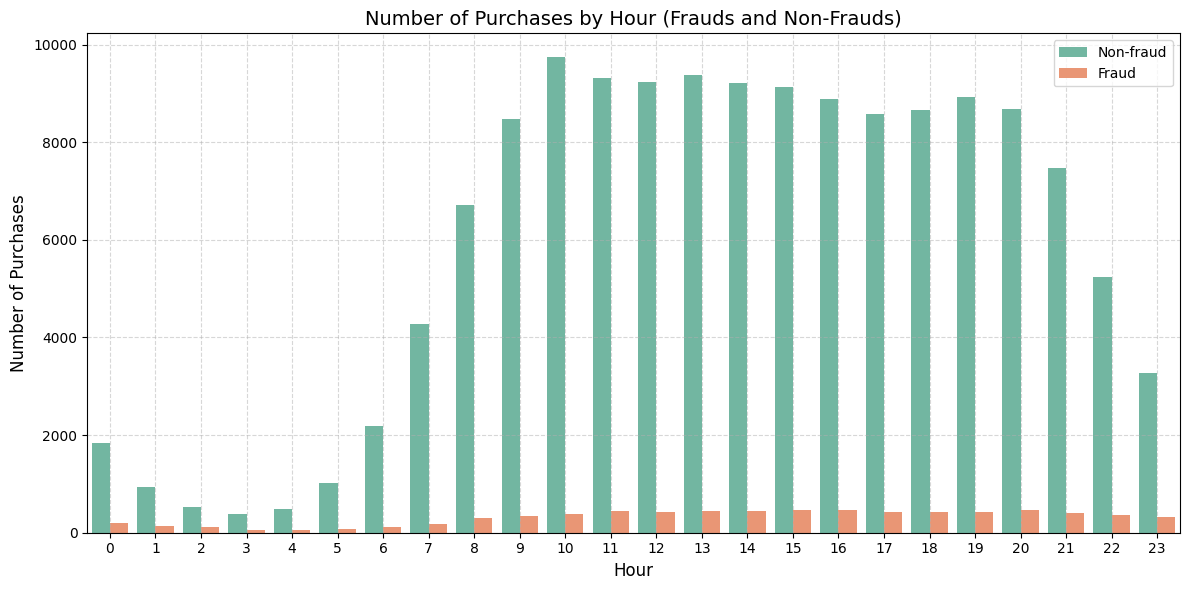

In [78]:
# Agrupando os dados para contar fraudes e n√£o fraudes por hora
purchases_per_hour = df_copy.groupby(['hora', 'fraude']).size().reset_index(name='quantidade')

# Criando o gr√°fico
plt.figure(figsize=(12, 6))
palette = sns.color_palette("Set2", n_colors=2)
sns.barplot(data=purchases_per_hour, x='hora', y='quantidade', hue='fraude', palette=palette)
plt.title('Number of Purchases by Hour (Frauds and Non-Frauds)', fontsize=14)
plt.xlabel('Hour', fontsize=12)
plt.ylabel('Number of Purchases', fontsize=12)
fraude_labels = {0: 'Non-fraud', 1: 'Fraud'}
handles, labels = plt.gca().get_legend_handles_labels()
plt.legend(handles, [fraude_labels[int(label)] for label in labels])
plt.grid(visible=True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

In [34]:
# Criando uma tabela de conting√™ncia
contingency_table = pd.crosstab(df_copy['dia_do_mes'], df_copy['fraude'])

# Executando o teste Qui-Quadrado
chi2, p, dof, expected = chi2_contingency(contingency_table)

# Exibindo os resultados
print("Estat√≠stica Qui-Quadrado:", chi2)
print("P-valor:", p)
print("Graus de liberdade:", dof)

# Verificando a hip√≥tese nula
alpha = 0.05
if p < alpha:
    print("Rejeitamos a hip√≥tese nula: Existe uma rela√ß√£o significativa entre 'dia_do_mes' e 'fraude'.")
else:
    print("N√£o rejeitamos a hip√≥tese nula: N√£o h√° evid√™ncia suficiente para afirmar que 'dia_do_mes' e 'fraude' est√£o relacionados.")

Estat√≠stica Qui-Quadrado: 176.07910490044085
P-valor: 1.3308511585064855e-22
Graus de liberdade: 30
Rejeitamos a hip√≥tese nula: Existe uma rela√ß√£o significativa entre 'dia_do_mes' e 'fraude'.


In [35]:
# Criando uma tabela de conting√™ncia
contingency_table = pd.crosstab(df_copy['hora'], df_copy['fraude'])

# Executando o teste Qui-Quadrado
chi2, p, dof, expected = chi2_contingency(contingency_table)

# Exibindo os resultados
print("Estat√≠stica Qui-Quadrado:", chi2)
print("P-valor:", p)
print("Graus de liberdade:", dof)

# Verificando a hip√≥tese nula
alpha = 0.05
if p < alpha:
    print("Rejeitamos a hip√≥tese nula: Existe uma rela√ß√£o significativa entre 'hora' e 'fraude'.")
else:
    print("N√£o rejeitamos a hip√≥tese nula: N√£o h√° evid√™ncia suficiente para afirmar que 'hora' e 'fraude' est√£o relacionados.")

Estat√≠stica Qui-Quadrado: 841.6593861727897
P-valor: 5.3030288311866235e-163
Graus de liberdade: 23
Rejeitamos a hip√≥tese nula: Existe uma rela√ß√£o significativa entre 'hora' e 'fraude'.


Em rela√ß√£o √†s vari√°veis temporais (dia do m√™s e hora da compra), apesar de ambas apresentarem uma rela√ß√£o significativa com a target fraude, n√£o acho que seja interessante lev√°-las para o treinamento do modelo por acrescentarem alguns pontos de complexidade que n√£o fariam sentido para o projeto.

Por exemplo, se o modelo perceber que muitas transa√ß√µes fraudulentas s√£o realizadas em um per√≠odo da madrugada, ele poder√° bloquear muitas transa√ß√µes naqueles hor√°rios, "alertando" os golpistas que automaticamente ir√£o mudar suas estrat√©gias, fazendo compras em hor√°rios alternativos. Assim o modelo precisaria se reajustar para entender essa din√¢mica. Por isso vamos manter essas vari√°veis de fora.

A √∫ltima hip√≥tese que eu gostaria de testar √© da rela√ß√£o entre o valor da compra e a vari√°vel fraude. Para isso, irei utilizar o m√©todo Mann-Whitney U Test, que √© apropriado quando n√£o se pode assumir normalidade na distribui√ß√£o dos dados. No caso do valor da compra, que pode ter uma distribui√ß√£o n√£o normal e valores extremos (outliers), este teste √© mais robusto e confi√°vel.

In [36]:
# Separando os valores de compra por categoria de fraude
fraud_values = df[df['fraude'] == 1]['valor_compra']
non_fraud_values = df[df['fraude'] == 0]['valor_compra']

# Realizando o teste Mann-Whitney U
stat, p = mannwhitneyu(fraud_values, non_fraud_values, alternative='two-sided')

# Exibindo os resultados
print("Estat√≠stica U:", stat)
print("P-valor:", p)

# Verificando a hip√≥tese nula
alpha = 0.05
if p < alpha:
    print("Rejeitamos a hip√≥tese nula: Existe uma rela√ß√£o significativa entre 'valor_compra' e 'fraude'.")
else:
    print("N√£o rejeitamos a hip√≥tese nula: N√£o h√° evid√™ncia suficiente para afirmar que 'valor_compra' e 'fraude' est√£o relacionados.")

Estat√≠stica U: 605362835.0
P-valor: 5.049078387837292e-84
Rejeitamos a hip√≥tese nula: Existe uma rela√ß√£o significativa entre 'valor_compra' e 'fraude'.


# Divis√£o do Conjunto de Dados

Antes de realizar o pr√©-processamento, √© importante separar o dataframe em dados de treino e teste para garantir que o modelo seja treinado e avaliado de maneira eficaz. Isso √© fundamental porque a separa√ß√£o precoce evita que o modelo tenha acesso a dados futuros durante o treinamento, o que pode levar a uma avalia√ß√£o superestimada de seu desempenho.

A separa√ß√£o dos dados ajuda a mitigar o risco de overfitting (sobreajuste), que ocorre quando o modelo aprende excessivamente os detalhes e o ru√≠do dos dados de treinamento, tornando-se muito espec√≠fico e incapaz de generalizar para novos dados. O underfitting (subajuste), por outro lado, ocorre quando o modelo √© muito simples ou n√£o consegue capturar padr√µes importantes dos dados, resultando em um desempenho abaixo do esperado, tanto nos dados de treino quanto nos dados de teste.

Ao separar os dados antes do pr√©-processamento, garantimos que as m√©tricas de desempenho, como precis√£o e recall, sejam avaliadas de forma justa e representem a verdadeira capacidade do modelo em dados n√£o vistos.

In [37]:
# Fun√ß√£o de separa√ß√£o do dataframe para testes futuros com todas as colunas
def split_df(df):
  df_train, df_test = train_test_split(df, test_size=0.2, random_state=42)
  return df_train, df_test

df_train, df_test = split_df(df)

X_train = df_train.drop('fraude', axis=1)
y_train = df_train.fraude

X_test = df_test.drop('fraude', axis=1)
y_test = df_test.fraude

# Exibindo as formas das divis√µes
print(f"Shape dos dados de treino (X_train): {X_train.shape}")
print(f"Shape dos dados de teste (X_test): {X_test.shape}")

Shape dos dados de treino (X_train): (120000, 19)
Shape dos dados de teste (X_test): (30000, 19)


# Modelo Baseline

Agora vamos analisar os resultados que o modelo anterior conseguiu atingir, para saber qual o nosso threshold, ou seja, nosso limite m√≠nimo para superar os resultados das previs√µes anteriores.

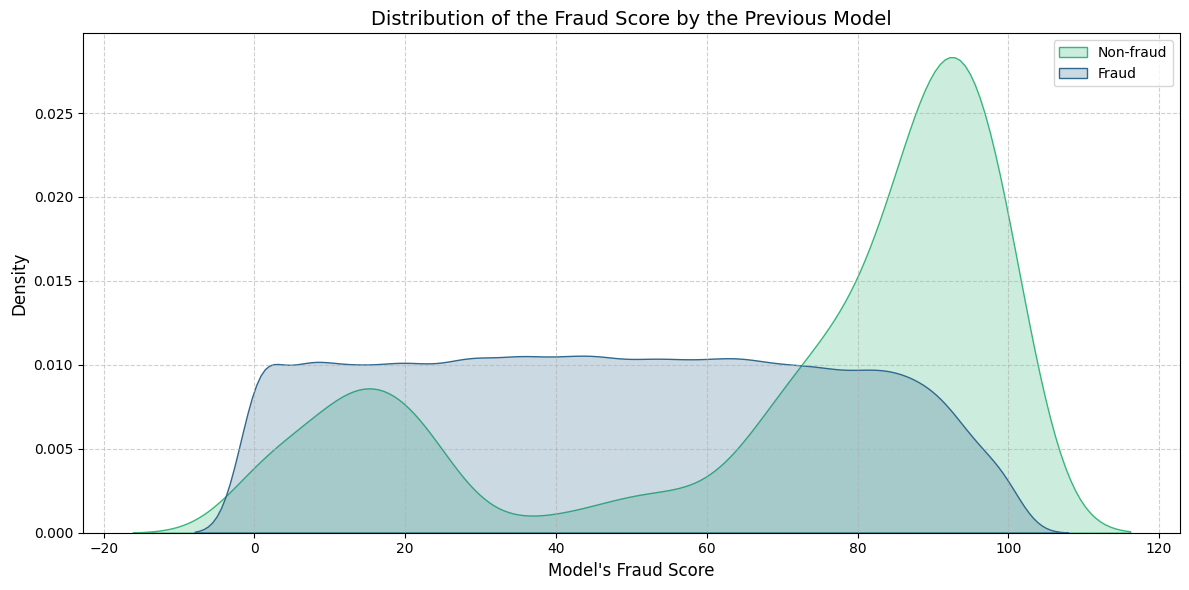

In [79]:
# Configurando o tamanho da figura
plt.figure(figsize=(12, 6))

# Plot de densidade (KDE plot)
sns.kdeplot(data=df, x='score_fraude_modelo', hue='fraude', common_norm=False, fill=True, palette='viridis')
plt.title('Distribution of the Fraud Score by the Previous Model', fontsize=14)
plt.xlabel("Model's Fraud Score", fontsize=12)
plt.ylabel('Density', fontsize=12)
plt.legend(labels=['Non-fraud', 'Fraud'])
plt.grid(visible=True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

Somente pela visualiza√ß√£o de distribui√ß√£o acima, j√° percebemos que o modelo anterior n√£o teve um grande desempenho, chegando a ter quase 100% de certeza que alguns registros eram fraudes, quando na verdade n√£o eram.

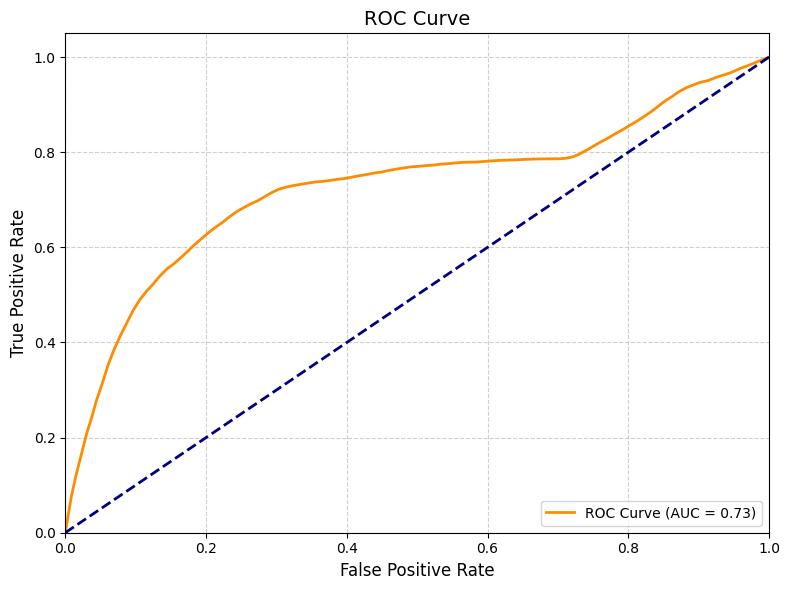

In [80]:
# Calculando as taxas de verdadeiros positivos e falsos positivos
fpr, tpr, thresholds = roc_curve(df['fraude'], df['score_fraude_modelo'])

# Calculando a AUC
auc = roc_auc_score(df['fraude'], df['score_fraude_modelo'])

# Plotando a Curva ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC Curve (AUC = {auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=12)
plt.ylabel('True Positive Rate', fontsize=12)
plt.title('ROC Curve', fontsize=14)
plt.legend(loc='lower right')
plt.grid(visible=True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

1. Interpreta√ß√£o da AUC:

- Uma AUC de 0.73 indica que o modelo tem uma capacidade moderada de discriminar entre fraudes e n√£o fraudes. A AUC varia de 0 a 1, onde 1 representa um modelo perfeito e 0.5 representa um modelo sem poder discriminativo (equivalente a uma classifica√ß√£o aleat√≥ria).
- Com 0.73, o modelo atual √© melhor do que uma classifica√ß√£o aleat√≥ria, mas ainda h√° espa√ßo significativo para melhorias.

2. Curva ROC:

- A curva ROC em si mostra a rela√ß√£o entre a taxa de verdadeiros positivos (sensibilidade) e a taxa de falsos positivos (1 - especificidade) em diferentes limiares de classifica√ß√£o.
- A curva est√° acima da linha diagonal (linha de n√£o discrimina√ß√£o), o que √© bom, mas a inclina√ß√£o poderia ser mais acentuada para indicar uma melhor performance.

### Pontos a Considerar:
- Melhoria do Modelo: Com uma AUC de 0.73, o modelo est√° acertando mais do que errando, mas √© crucial entender onde ele est√° falhando. Analisar casos espec√≠ficos de falsos positivos e falsos negativos pode ajudar a refinar o modelo.
- Balanceamento dos Dados: Certifique-se de que os dados de fraude e n√£o fraude est√£o balanceados ou use t√©cnicas de balanceamento para evitar vi√©s no treinamento.
- Ajuste de Hiperpar√¢metros: Ajustar os hiperpar√¢metros do modelo pode levar a uma melhor performance.
- Features Adicionais: Considere a engenharia de novas features ou a transforma√ß√£o de features existentes para melhorar a performance do modelo.

### M√©tricas de business e defini√ß√£o de um threshold

Agora eu quero calcular quais foram os ganhos, perdas e lucros para cada valor da coluna `score_fraude_modelo`, analisando qual o valor limite (threshold) que maximiza o lucro das previs√µes. Esse valor servir√° de compara√ß√£o para o modelo posterior, que ter√° o trabalho de aumentar o lucro gerado por esse modelo.

Para isso, vamos considerar as informa√ß√µes que nos foram dadas inicialmente:
- a institui√ß√£o financeira ganha 10% do valor de cada pagamento aprovado corretamente
- cada fraude aprovada resulta na perda de 100% do valor do pagamento

Com isso, conseguimos considerar a defini√ß√£o correta de fraude ou n√£o fraude pela coluna `fraude`, baseada em cada valor poss√≠vel da coluna `score_fraude_modelo`. Com ganhos e perdas calculados, √© s√≥ fazer a subtra√ß√£o para termos o lucro.

O melhor threshold √©: 73
O lucro m√°ximo √©: USD 54976.67


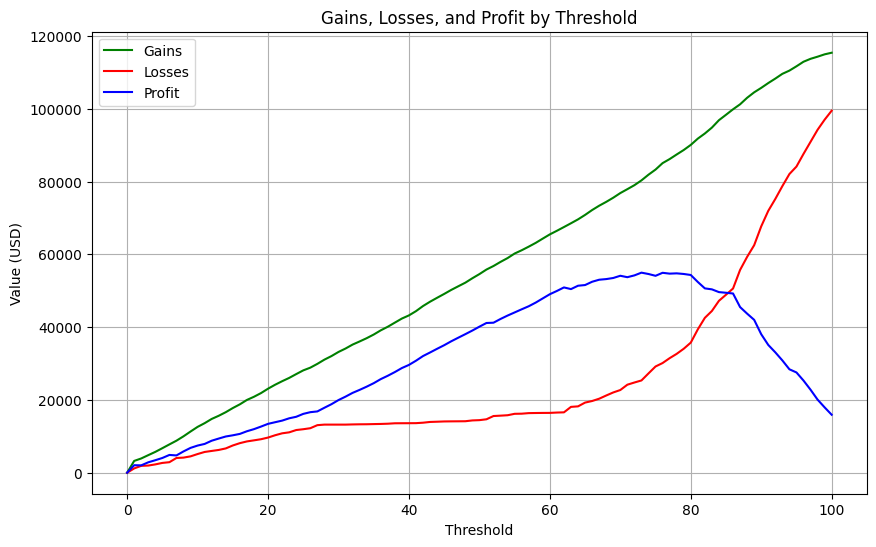

In [82]:
# Inicializando listas para armazenar os resultados
thresholds = np.arange(0, 101)
gains_list = []
losses_list = []
profit_list = []

# Calculando ganhos, perdas e lucro para cada threshold
for threshold in thresholds:
    df_test['fraude_predita'] = df_test['score_fraude_modelo'] >= threshold
    
    gains = df_test[(df_test['fraude'] == 0) & (df_test['fraude_predita'] == False)]['valor_compra'].sum() * 0.1
    losses = df_test[(df_test['fraude'] == 1) & (df_test['fraude_predita'] == False)]['valor_compra'].sum()
    profit = gains - losses
    
    gains_list.append(gains)
    losses_list.append(losses)
    profit_list.append(profit)

# Convertendo listas para um dataframe para facilitar a an√°lise
results_df = pd.DataFrame({
    'Threshold': thresholds,
    'Ganhos': gains_list,
    'Perdas': losses_list,
    'Lucro': profit_list
})

# Encontrando o threshold que maximiza o lucro
best_threshold = results_df.loc[results_df['Lucro'].idxmax(), 'Threshold']
max_profit = results_df['Lucro'].max()

print(f'O melhor threshold √©: {best_threshold}')
print(f'O lucro m√°ximo √©: USD {max_profit:.2f}')

plt.figure(figsize=(10, 6))
plt.plot(results_df['Threshold'], results_df['Ganhos'], label='Gains', color='green')
plt.plot(results_df['Threshold'], results_df['Perdas'], label='Losses', color='red')
plt.plot(results_df['Threshold'], results_df['Lucro'], label='Profit', color='blue')
plt.xlabel('Threshold')
plt.ylabel('Value (USD)')
plt.title('Gains, Losses, and Profit by Threshold')
plt.legend()
plt.grid(True)
plt.show()

In [41]:
# Visualizando o dataframe do gr√°fico
results_df

Threshold      Ganhos    Perdas      Lucro
0            0       0.000      0.00      0.000
1            1    3242.109   1181.23   2060.879
2            2    3917.883   1890.99   2026.893
3            3    4829.258   1969.12   2860.138
4            4    5726.876   2288.36   3438.516
..         ...         ...       ...        ...
96          96  112932.551  87603.24  25329.311
97          97  113735.367  90925.22  22810.147
98          98  114322.705  94238.31  20084.395
99          99  114967.326  97012.02  17955.306
100        100  115411.573  99482.83  15928.743

[101 rows x 4 columns]

In [42]:
results_df[results_df['Threshold'] == 73]

Threshold     Ganhos    Perdas      Lucro
73         73  80329.995  25353.32  54976.675

In [43]:
print(f'Raz√£o de lucro: {54976.675 / 80329.995}')

Raz√£o de lucro: 0.6843853905381172


Com as visualiza√ß√µes acima descobrimos que o valor da coluna `score_fraude_modelo` que maximizava os lucros era 73, que nesse caso gerou mais de 80 mil d√≥lares de ganhos, por√©m gerou mais de 25 mil d√≥lares de perdas, totalizando aproximadamente 55 mil d√≥lares de lucro. √â importante lembrar que para esse c√°lculo foi utilizada uma amostra do dataframe, ent√£o se pegarmos uma amostra maior, o lucro certamente ser√° maior tamb√©m.

O importante √© fazer essa compara√ß√£o com o modelo que ser√° contru√≠do posteriormente, com uma amostra de dados do mesmo tamanho, confirmando que as novas previs√µes superam os lucros gerados pelo modelo anterior.

Agora vamos seguir com uma matriz de confus√£o, ainda usando os dados de teste separados somente para a an√°lise do modelo baseline.

In [44]:
df_test['predicted'] = df_test['score_fraude_modelo'] >= best_threshold
cm = confusion_matrix(df_test['fraude'], df_test['predicted'])

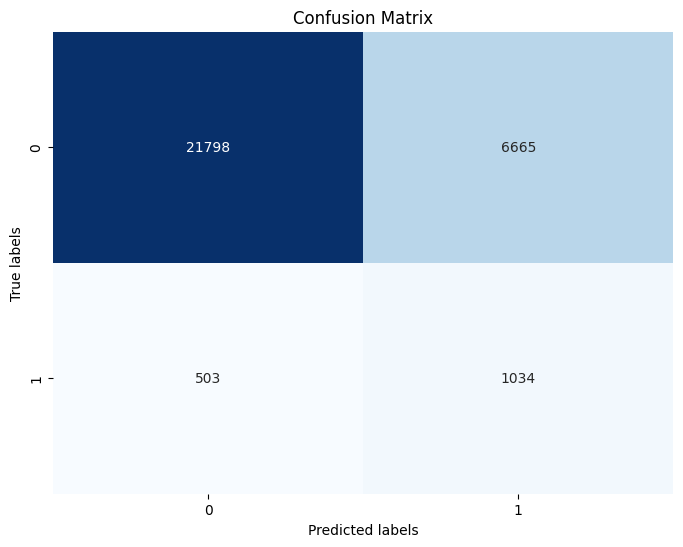

In [45]:
def plot_confusion_matrix(cm):
  plt.figure(figsize=(8, 6))
  sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
  plt.xlabel('Predicted labels')
  plt.ylabel('True labels')
  plt.title('Confusion Matrix')
  plt.show()
  
plot_confusion_matrix(cm)

In [46]:
TN = cm[0][0]
FP = cm[0][1]
FN = cm[1][0]
TP = cm[1][1]

fraud_rate = round(FN / (FN + TN), 2)
approval_rate = round((FN + TN) / (TN + FP + TP + FN), 2)

print(f'Taxa de fraude = {fraud_rate}')
print(f'Taxa de aprova√ß√£o = {approval_rate}')

Taxa de fraude = 0.02
Taxa de aprova√ß√£o = 0.74


Explicando os resultados...

Taxa de Fraude:
- Interpreta√ß√£o: A taxa de fraude √© a propor√ß√£o de transa√ß√µes fraudulentas n√£o detectadas (falsos negativos, ou FN) em rela√ß√£o ao total de transa√ß√µes que foram consideradas n√£o fraudulentas pelo modelo (falsos negativos + verdadeiros negativos, ou FN + TN).
- Resultado: 0.02
  - Isso significa que 2% das transa√ß√µes que o modelo classificou como n√£o fraudulentas (ou seja, aprovadas) s√£o, na verdade, fraudes. Em outras palavras, apenas 2% das fraudes passaram despercebidas pelo modelo entre as transa√ß√µes consideradas leg√≠timas.

Taxa de Aprova√ß√£o:
- Interpreta√ß√£o: A taxa de aprova√ß√£o √© a propor√ß√£o do total de transa√ß√µes que o modelo classificou como n√£o fraudulentas (FN + TN) em rela√ß√£o ao total de transa√ß√µes analisadas (todos os quatro componentes da matriz de confus√£o: TN, FP, TP, FN).
- Resultado: 0.74
  - Isso indica que 74% de todas as transa√ß√µes analisadas foram aprovadas como n√£o fraudulentas pelo modelo. Em outras palavras, o modelo aprovou 74% das transa√ß√µes, considerando-as seguras.

Agora vamos analisar outras m√©tricas n√£o vistas para esse modelo, que s√£o: Log Loss, Precision, Recall e F1-score.

In [47]:
# Convertendo as probabilidades em classifica√ß√µes bin√°rias com base no melhor threshold encontrado anteriormente
y_pred_binary = df_test['score_fraude_modelo'] >= best_threshold

# Calcula as m√©tricas de desempenho
loss = log_loss(y_test, y_pred_binary)
precision = precision_score(y_test, y_pred_binary)
recall = recall_score(y_test, y_pred_binary)
f1 = f1_score(y_test, y_pred_binary)

# Imprime as m√©tricas de desempenho
print(f'Log Loss: {loss:.4f}')
print(f'Precis√£o: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1-score: {f1:.2f}')

Log Loss: 8.6120
Precis√£o: 0.13
Recall: 0.67
F1-score: 0.22


### 1. Log Loss
Log Loss (ou "Logarithmic Loss") √© uma m√©trica que mede o desempenho de um modelo de classifica√ß√£o probabil√≠stico. Ele avalia a incerteza das previs√µes feitas pelo modelo, penalizando predi√ß√µes erradas com alta confian√ßa.

*Interpreta√ß√£o:*

Baixo Log Loss: Indica que o modelo est√° fazendo boas previs√µes probabil√≠sticas.
Alto Log Loss: Indica que o modelo est√° fazendo previs√µes com alta incerteza ou previs√µes erradas com alta confian√ßa.

O valor de 8.6120 √© bastante alto, sugerindo que o modelo n√£o est√° fazendo previs√µes confi√°veis. Ele est√° frequentemente muito confiante nas predi√ß√µes erradas.

### 2. Precis√£o
Precis√£o √© a raz√£o entre o n√∫mero de verdadeiros positivos (TP) e o n√∫mero total de inst√¢ncias classificadas como positivas (TP + FP).
‚Äã
*Interpreta√ß√£o:*

Alta Precis√£o: Indica que, das inst√¢ncias que o modelo classificou como positivas, uma alta propor√ß√£o realmente era positiva.
Baixa Precis√£o: Indica que muitas das inst√¢ncias classificadas como positivas pelo modelo eram, na verdade, negativas (falsos positivos).

Um valor de 0.13 significa que apenas 13% das transa√ß√µes que o modelo classificou como fraudes eram realmente fraudes. Isso √© uma precis√£o muito baixa, indicando muitos falsos positivos.

### 3. Recall
Recall (ou "Sensibilidade" ou "Taxa de Verdadeiros Positivos") √© a raz√£o entre o n√∫mero de verdadeiros positivos (TP) e o n√∫mero total de inst√¢ncias que realmente s√£o positivas (TP + FN).
‚Äã
*Interpreta√ß√£o:*

Alto Recall: Indica que o modelo est√° identificando a maioria das inst√¢ncias positivas.
Baixo Recall: Indica que o modelo est√° perdendo muitas inst√¢ncias positivas (falsos negativos).

Um valor de 0.67 significa que o modelo est√° detectando 67% das fraudes reais, o que √© relativamente bom, mas ainda h√° espa√ßo para melhorias.

### 4. F1-Score
F1-Score √© a m√©dia harm√¥nica da precis√£o e do recall, fornecendo uma √∫nica m√©trica que balanceia ambos.
‚Äã
*Interpreta√ß√£o:*

Alto F1-Score: Indica um bom equil√≠brio entre precis√£o e recall.
Baixo F1-Score: Indica que o modelo tem uma performance ruim em um ou ambos (precis√£o e recall).

Um valor de 0.22 √© baixo, indicando que o modelo tem um desempenho geral fraco. Isso reflete a baixa precis√£o, apesar de um recall relativamente alto.

Novamente, esses resultados das m√©tricas acima servir√£o de compara√ß√£o para o novo modelo mais pro final do projeto.

# Pr√©-processamento

### Considera√ß√µes
- Todos os valores da coluna `valor_compra` est√£o em d√≥lares;
- N√£o teremos a possibilidade de data leakage, ou seja, todos os dados que est√£o no dataframe inicial do projeto sempre ser√£o recebidos e calculados antes do evento de "Fraude" ocorrer.

### O que ser√° feito no pr√©-processamento:
- Excluir a coluna `score_fraude_modelo`, visto que ela servia como modelo baseline, e agora n√£o ser√° mais usada;
- Excluir a coluna `data_compra` para n√£o adicionar a complexidade temporal citada durante a parte de an√°lise dos dados;
- Excluir a coluna `produto`, por ter uma alta cardinalidade (s√£o mais de 127 mil valores √∫nicos, dentro de 150 mil registros);
- Excluir a coluna `score_8` pois isso ajudar√° a diminuir o ru√≠do (coluna com valores com quase nenhuma distin√ß√£o entre fraude e n√£o fraude, n√£o agregando muito para o treinamento do modelo);
- Separar a coluna `categoria_produto` em menos valores √∫nicos, mantendo as 1000 categorias (aproximadamente 11% das categorias) que representam 85% das fraudes, e agrupando o restante das categorias como "Outros";
- Realizar algo parecido com a coluna `pais`, mantendo apenas Brasil e Argentina (BR e AR) por representarem mais de 97% dos registros, e agrupar o restante dos pa√≠ses como "Outros";
- Preencher os valores nulos de score com a mediana, por n√£o seguirem uma distribui√ß√£o normal;
- Preencher os valores nulos de `entrega_doc_2` com 0, visto que no in√≠cio do projeto a informa√ß√£o era que valores nulos seriam a mesma coisa que "n√£o entregou" (al√©m disso preciso mudar os valores "Y" e "N" das colunas `entrega_doc_2` e `entrega_doc_3` para 0 e 1, assim o modelo conseguir√° interpretar corretamente o que √© entrega ou n√£o);
- Criar uma feature `was_null` que indicar√° os registros de `entrega_doc_2` que eram nulos antes da transforma√ß√£o;
- Fazer target encoder na coluna `categoria_produto` devido √† alta cardinalidade (mesmo que eu diminua para 1001 valores √∫nicos, s√£o muitos valores). Al√©m disso, usar t√©cnica de cross validation junto com o encoder, pois como temos muitas categorias, n√£o queremos mais de uma com o mesmo valor (empatadas);
- Fazer one hot encoder nas demais vari√°veis categ√≥ricas.

In [48]:
class ColumnDropper(BaseEstimator, TransformerMixin):
    
    def fit(self, X, y=None):
        return self
    
    def transform(self, X):
        return X.drop(columns=['data_compra', 'produto', 'score_8', 'score_fraude_modelo', 'categoria_produto'], axis = 1)
    
class DataProcessor(BaseEstimator, TransformerMixin):
    
    def fit(self, X, y = None):
        return self
    
    def transform(self, X):
        X_copy = X.copy()
        
        # Cria a coluna 'was_null'
        X_copy['was_null'] = X_copy['entrega_doc_2'].isnull().astype(int)
        
        # Preenche os valores nulos com 0
        X_copy['entrega_doc_2'] = X_copy['entrega_doc_2'].fillna('N')
        X_copy['entrega_doc_2'] = X_copy['entrega_doc_2'].apply(lambda x: 1 if x == 'Y' else 0)

        # Processamento de colunas espec√≠ficas
        X_copy['pais'] = X_copy['pais'].apply(lambda x: x if x in ['BR', 'AR'] else 'Outros')
        X_copy['entrega_doc_3'] = X_copy['entrega_doc_3'].apply(lambda x: 1 if x == 'Y' else 0)
       
        return X_copy

class ScoreImputer(BaseEstimator, TransformerMixin):
    
    def __init__(self):
        self.imputers = {}
    
    def fit(self, X, y = None):
        cols = ['score_2', 'score_3', 'score_4', 'score_5', 'score_6', 'score_7', 'score_9', 'score_10']
        for col in cols:
            imputer = SimpleImputer(strategy = "median")
            imputer.fit(X[[col]])
            self.imputers[col] = imputer
        return self
    
    def transform(self, X):
        X_copy = X.copy()
        for col, imputer in self.imputers.items():
            X_copy[col] = imputer.transform(X_copy[[col]])
        return X_copy
    
    
class OneHotFeatureEncoder(BaseEstimator, TransformerMixin):
    
    def __init__(self):
        self.encoder = OneHotEncoder(sparse_output=False)
        self.cols = ['score_1', 'pais', 'entrega_doc_1', 'entrega_doc_2', 'entrega_doc_3', 'was_null']
    
    def fit(self, X, y=None):
        self.encoder.fit(X[self.cols])
        return self
    
    def transform(self, X):
        onehot_data = self.encoder.transform(X[self.cols])
        
        # Convertendo o array onehot_data em um DataFrame
        onehot_df = pd.DataFrame(onehot_data, columns=self.encoder.get_feature_names_out(self.cols))
        
        # Para garantir que os √≠ndices estejam alinhados, vamos redefinir o √≠ndice do onehot_df para corresponder ao de X
        onehot_df.index = X.index
        
        X = X.drop(self.cols, axis=1)
        X = pd.concat([X, onehot_df], axis=1)
        
        return X
    
class KFoldTargetEncoder(BaseEstimator, TransformerMixin):

    def __init__(self):

        self.colnames = 'categoria_produto'
        self.targetName = 'fraude'
        self.n_fold = 5
        self.verbosity = True
        self.discardOriginal_col = False

    def fit(self, X, y=None):
        return self
    
    def transform(self,X):

        assert(type(self.targetName) == str)
        assert(type(self.colnames) == str)
        assert(self.colnames in X.columns)
        assert(self.targetName in X.columns)

        mean_of_target = X[self.targetName].mean()
        kf = KFold(n_splits = self.n_fold, shuffle = True, random_state=42)


        col_mean_name = self.colnames + '_' + 'Kfold_Target_Enc'
        X[col_mean_name] = np.nan

        for tr_ind, val_ind in kf.split(X):
            X_tr, X_val = X.iloc[tr_ind], X.iloc[val_ind]
            X.loc[X.index[val_ind], col_mean_name] = X_val[self.colnames].map(X_tr.groupby(self.colnames)[self.targetName].mean())

        X[col_mean_name].fillna(mean_of_target, inplace = True)

        if self.verbosity:
            encoded_feature = X[col_mean_name].values
            
        if self.discardOriginal_col:
            X = X.drop(self.targetName, axis=1)
        
        return X

def pipeline(model):
    
    # Criando o pipeline
    pipe = Pipeline([
        ("dropper", ColumnDropper()),
        ("processor", DataProcessor()),
        ("imputer", ScoreImputer()),
        ("onehot", OneHotFeatureEncoder()),
        ('classifier', model)
    ])
    
    return pipe

In [49]:
df_copy = df.copy()

# Mant√©m as 1000 categorias com mais de 85% das fraudes
product_categories = df_item_fraud[1000:]
list_other_categories = product_categories.categoria_produto.to_list()
df_copy.loc[df_copy["categoria_produto"].isin(list_other_categories), "categoria_produto"] = "Outros"

df_train, df_test = split_df(df_copy)
        
#criando encoder usando Target Encoder para o grupo_categorias devido a alta cardinalidade
targetc = KFoldTargetEncoder()
df_train = targetc.fit_transform(df_train)
df_test = targetc.transform(df_test)

X_train = df_train.drop('fraude', axis=1)
y_train = df_train.fraude

X_test = df_test.drop('fraude', axis=1)
y_test = df_test.fraude

# Treinamento dos Algoritmos de Machine Learning

Agora vamos comparar alguns modelos que podem ser interessantes para o projeto, considerando alguns pontos:
- O dataframe original tem uma vari√°vel alvo (ser√° um aprendizado supervisionado)
- Os dados s√£o desbalanceados e n√£o est√£o na mesma escala
- A vari√°vel alvo √© de classifica√ß√£o (nesse caso, fraude ou n√£o fraude)

Balanced RF: 0.851875 (0.003310)
[LightGBM] [Info] Number of positive: 4754, number of negative: 91246
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003785 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2180
[LightGBM] [Info] Number of data points in the train set: 96000, number of used features: 25
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Start training from score 0.000000
[LightGBM] [Info] Number of positive: 4741, number of negative: 91259
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003472 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2180
[LightGBM] [Info] Number of data points in the train set: 96000, number of used fe

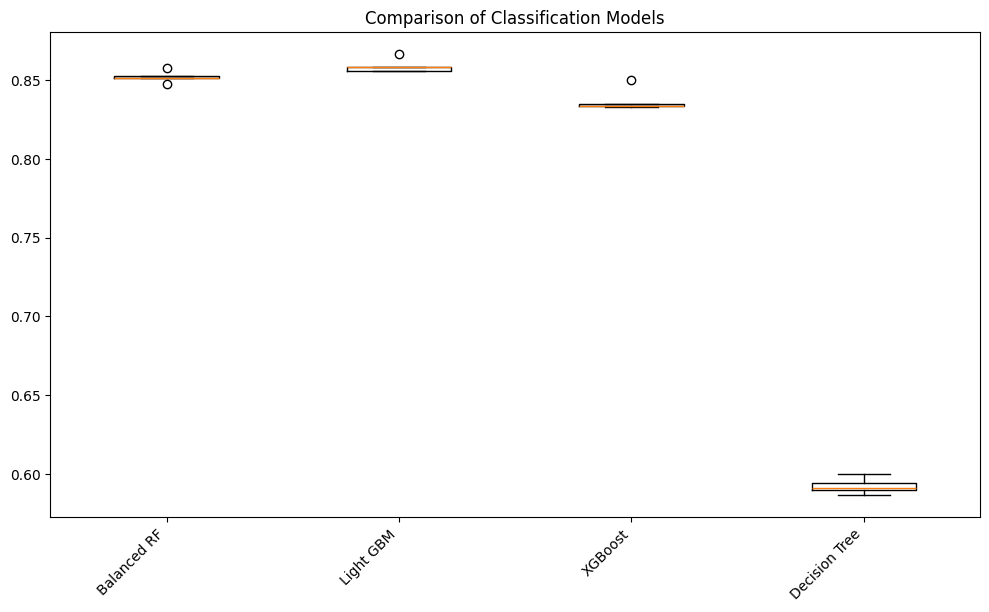

In [50]:
BRC = BalancedRandomForestClassifier(random_state=1234)
XGB = XGBClassifier(scale_pos_weight=19, random_state=1234)
LGB = LGBMClassifier(class_weight='balanced', random_state=1234)
DTC = DecisionTreeClassifier(class_weight='balanced', random_state=1234)

models = [BRC, LGB, XGB, DTC]

# Usando nomes mais curtos para facilitar
model_names = ["Balanced RF", "Light GBM", "XGBoost", "Decision Tree"]

results = []

# Treinando modelos
for item in models:
    pipe = pipeline(item)
    kfold = KFold(n_splits=5, random_state=42, shuffle=True)
    cv_results = cross_val_score(pipe, X_train, y_train, cv=kfold, scoring='roc_auc')
    results.append(cv_results)
    msg = "%s: %f (%f)" % (model_names[models.index(item)], cv_results.mean(), cv_results.std())
    print(msg)

# Plotando a compara√ß√£o dos modelos
fig, ax = plt.subplots(figsize=(10, 6))
ax.boxplot(results)
ax.set_xticklabels(model_names)
plt.setp(ax.get_xticklabels(), rotation=45, ha="right", fontsize=10)
plt.tight_layout()
plt.title('Comparison of Classification Models')
plt.show()

√â percept√≠vel a diferen√ßa do Decision Tree para os outros modelos, sendo que os outros 3 tiveram resultados muito melhores. Apesar do Light GBM e do Balanced RF terem resultados muito pr√≥ximos, seguirei com o Light GBM para esse projeto, principalmente porque ele √© uma escolha s√≥lida para detec√ß√£o de fraudes em transa√ß√µes financeiras devido √† sua efici√™ncia, capacidade de lidar com dados desequilibrados, alta performance e flexibilidade.

# Ajuste dos hiperpar√¢metros

In [51]:
mlflow.end_run()

In [52]:
mlflow.set_tracking_uri("http://127.0.0.1:5000")
mlflow.set_experiment(experiment_name="Pipeline")
mlflow.start_run(run_name="Light GBM")

LGB = LGBMClassifier(class_weight='balanced', random_state=1234)
pipe = pipeline(LGB)

parameters = {
    'classifier__num_leaves': [31, 50, 100, 150],
    'classifier__max_depth': [10, 20, 30, 40, -1],
    'classifier__learning_rate': [0.01, 0.05, 0.1],
    'classifier__n_estimators': [80, 100, 150, 200],
    'classifier__min_child_samples': [5, 10, 20, 50],
    'classifier__min_child_weight': [1e-5, 1e-3, 1e-2, 1e-1, 1],
    'classifier__subsample': [0.8, 0.9, 1.0],
    'classifier__colsample_bytree': [0.6, 0.8, 1.0],
    'classifier__reg_alpha': [0, 1e-1, 1, 2],
    'classifier__reg_lambda': [0, 1e-1, 1, 5],
    'classifier__boosting_type': ['gbdt', 'dart', 'goss']
}

random_search = RandomizedSearchCV(pipe, parameters, cv=4, n_jobs=4, scoring="roc_auc")
random_search.fit(X_train, y_train)
print("Best parameter (CV score=%0.3f):" % random_search.best_score_)
print(random_search.best_params_)
mlflow.log_metric("training_roc_auc", random_search.best_score_)

[LightGBM] [Warning] Found boosting=goss. For backwards compatibility reasons, LightGBM interprets this as boosting=gbdt, data_sample_strategy=goss.To suppress this warning, set data_sample_strategy=goss instead.
[LightGBM] [Warning] Found boosting=goss. For backwards compatibility reasons, LightGBM interprets this as boosting=gbdt, data_sample_strategy=goss.To suppress this warning, set data_sample_strategy=goss instead.
[LightGBM] [Info] Number of positive: 5963, number of negative: 114037
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004219 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2180
[LightGBM] [Info] Number of data points in the train set: 120000, number of used features: 25
[LightGBM] [Info] Using GOSS
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=-0.000000
[LightGBM] [Info] Start training from sc

# Avaliando o Modelo com os Dados de Teste

Ap√≥s treinar alguns modelos e chegar na escolha final, est√° na hora de usar ele nos dados de teste, que ficaram intactos at√© o momento.

[LightGBM] [Warning] Found boosting=goss. For backwards compatibility reasons, LightGBM interprets this as boosting=gbdt, data_sample_strategy=goss.To suppress this warning, set data_sample_strategy=goss instead.
[LightGBM] [Warning] Found boosting=goss. For backwards compatibility reasons, LightGBM interprets this as boosting=gbdt, data_sample_strategy=goss.To suppress this warning, set data_sample_strategy=goss instead.


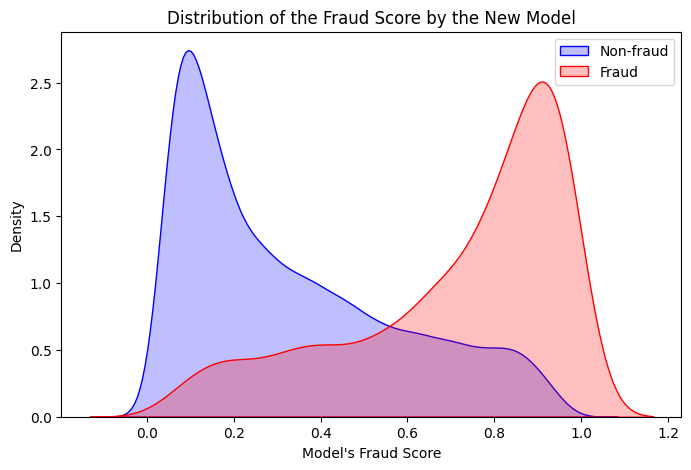

In [83]:
model = random_search.best_estimator_

y_test_pred = model.predict(X_test)
probs_test = model.predict_proba(X_test)

dataframe = df_test.copy()
dataframe['target_col'] = dataframe['fraude'] 
dataframe['prediction_col'] = probs_test[:,1]

fig, ax = plt.subplots(1, 1, figsize=(8, 5))
sns.kdeplot(data=dataframe[dataframe['target_col'] == 0], x='prediction_col', ax=ax, color="b", fill=True)
sns.kdeplot(data=dataframe[dataframe['target_col'] == 1], x='prediction_col', ax=ax, color="r", fill=True)

plt.title("Distribution of the Fraud Score by the New Model")
plt.xlabel("Model's Fraud Score")
plt.ylabel("Density")
plt.legend(labels=['Non-fraud', 'Fraud'])
plt.show()

A principal diferen√ßa com o gr√°fico do modelo anterior, √© que a densidade de "n√£o fraudes" aumentou bastante no novo modelo.

O melhor threshold √©: 66
O lucro m√°ximo √©: USD 70636.78


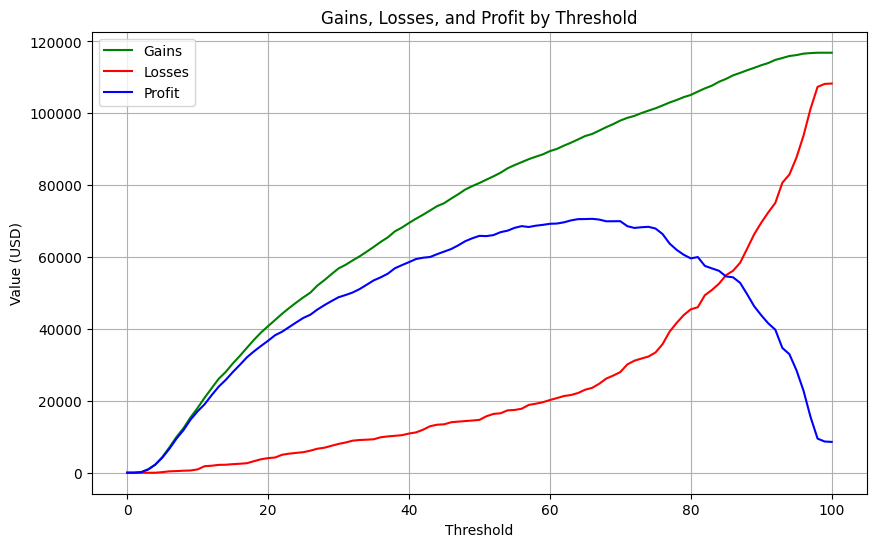

In [84]:
# Adicionando as previs√µes do novo modelo ao df_test com base nas probabilidades do novo modelo
df_test['new_predicted_fraud'] = probs_test[:, 1] * 100

# Inicializando listas para armazenar os resultados
thresholds = np.arange(0, 101)
gains_list = []
losses_list = []
profit_list = []

# Calculando ganhos, perdas e lucro para cada threshold
for threshold in thresholds:
    df_test['binary_predicted_fraud'] = df_test['new_predicted_fraud'] >= threshold
    
    gains = df_test[(df_test['fraude'] == 0) & (df_test['binary_predicted_fraud'] == False)]['valor_compra'].sum() * 0.1
    losses = df_test[(df_test['fraude'] == 1) & (df_test['binary_predicted_fraud'] == False)]['valor_compra'].sum()
    profit = gains - losses
    
    gains_list.append(gains)
    losses_list.append(losses)
    profit_list.append(profit)

# Convertendo listas para um dataframe para facilitar a an√°lise
results_df = pd.DataFrame({
    'Threshold': thresholds,
    'Ganhos': gains_list,
    'Perdas': losses_list,
    'Lucro': profit_list
})

# Encontrando o threshold que maximiza o lucro
best_threshold = results_df.loc[results_df['Lucro'].idxmax(), 'Threshold']
max_profit = results_df['Lucro'].max()

print(f'O melhor threshold √©: {best_threshold}')
print(f'O lucro m√°ximo √©: USD {max_profit:.2f}')

plt.figure(figsize=(10, 6))
plt.plot(results_df['Threshold'], results_df['Ganhos'], label='Gains', color='green')
plt.plot(results_df['Threshold'], results_df['Perdas'], label='Losses', color='red')
plt.plot(results_df['Threshold'], results_df['Lucro'], label='Profit', color='blue')
plt.xlabel('Threshold')
plt.ylabel('Value (USD)')
plt.title('Gains, Losses, and Profit by Threshold')
plt.legend()
plt.grid(True)
plt.show()

In [55]:
results_df[results_df['Threshold'] == 58]

Threshold     Ganhos    Perdas      Lucro
58         58  87928.089  19197.48  68730.609

In [56]:
best_profit_ratio = 68221.308 / 87466.838
print(f'Raz√£o de lucro: {best_profit_ratio}')

Raz√£o de lucro: 0.779967694727915


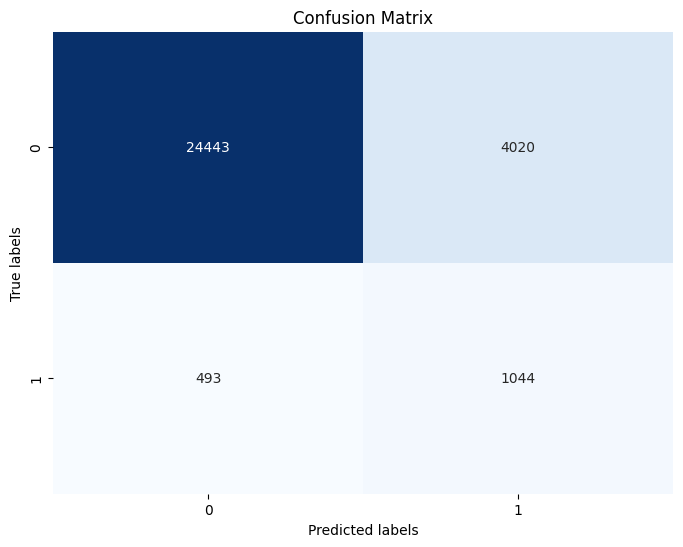

In [57]:
df_test['new_predicted'] = df_test['new_predicted_fraud'] >= best_threshold
cm = confusion_matrix(df_test['fraude'], df_test['new_predicted'])

def plot_confusion_matrix(cm):
  plt.figure(figsize=(8, 6))
  sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
  plt.xlabel('Predicted labels')
  plt.ylabel('True labels')
  plt.title('Confusion Matrix')
  plt.show()
  
plot_confusion_matrix(cm)

In [58]:
TN = cm[0][0]
FP = cm[0][1]
FN = cm[1][0]
TP = cm[1][1]

new_fraud_rate = round(FN / (FN + TN), 2)
new_approval_rate = round((FN + TN) / (TN + FP + TP + FN), 2)

print(f'Taxa de fraude = {new_fraud_rate}')
print(f'Taxa de aprova√ß√£o = {new_approval_rate}')

Taxa de fraude = 0.02
Taxa de aprova√ß√£o = 0.83


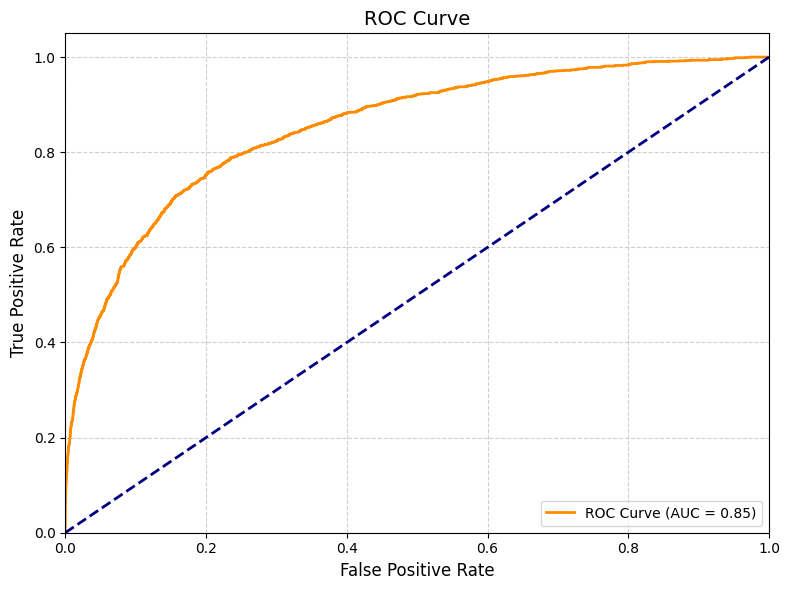

In [85]:
# Calculando as taxas de verdadeiros positivos e falsos positivos
fpr, tpr, thresholds = roc_curve(df_test['fraude'], df_test['new_predicted_fraud'])

# Calculando a AUC
auc = roc_auc_score(df_test['fraude'], df_test['new_predicted_fraud'])

# Plotando a Curva ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC Curve (AUC = {auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=12)
plt.ylabel('True Positive Rate', fontsize=12)
plt.title('ROC Curve', fontsize=14)
plt.legend(loc='lower right')
plt.grid(visible=True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

In [60]:
# Convertendo as probabilidades em classifica√ß√µes bin√°rias com base no melhor threshold encontrado anteriormente
y_pred_binary = df_test['new_predicted_fraud'] >= best_threshold

# Calcula as m√©tricas de desempenho
loss = log_loss(y_test, y_pred_binary)
precision = precision_score(y_test, y_pred_binary)
recall = recall_score(y_test, y_pred_binary)
f1 = f1_score(y_test, y_pred_binary)

# Imprime as m√©tricas de desempenho
print(f'Log Loss: {loss:.4f}')
print(f'Precis√£o: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1-score: {f1:.2f}')

Log Loss: 5.4222
Precis√£o: 0.21
Recall: 0.68
F1-score: 0.32


Com as m√©tricas e gr√°ficos do novo modelo, podemos verificar diversas melhoras (que ser√£o detalhadas no final do projeto):
- Com a mudan√ßa do threshold, o lucro e a raz√£o de lucro aumentaram;
- Apesar da taxa de fraude ter permancecido a mesma, a taxa de aprova√ß√£o aumentou;
- A AUC aumentou bastante, assim como as m√©tricas gerais melhoraram tamb√©m.

In [61]:
# Registrando as melhores m√©tricas e encerrando a run do MLFlow
mlflow.log_metrics({
    "best_profit": max_profit,
    "best_threshold": best_threshold,
    "Log Loss": loss,
    "ROC-AUC": auc,
    "Precision": precision,
    "Recall": recall,
    "F1-score": f1,
    "Taxa de fraude": fraud_rate,
    "Taxa de aprova√ß√£o": approval_rate,
    "Raz√£o de lucro": best_profit_ratio
})

mlflow.end_run()

üèÉ View run Light GBM at: http://127.0.0.1:5000/#/experiments/1/runs/2d6fdd198ca244d2a3d52991e0658e35
üß™ View experiment at: http://127.0.0.1:5000/#/experiments/1


# SHAP

Falando um pouco sobre o SHAP... ele √© utilizado para explicar e interpretar modelos de Machine Learning, fornecendo insights sobre como cada vari√°vel contribui para a predi√ß√£o de um modelo. Ele ajuda a entender o impacto das caracter√≠sticas nas decis√µes do modelo, promovendo transpar√™ncia e confian√ßa, al√©m de ser fundamental em √°reas sens√≠veis, como detec√ß√£o de fraudes, onde √© necess√°rio justificar as predi√ß√µes feitas.

In [62]:
import shap
shap.initjs()

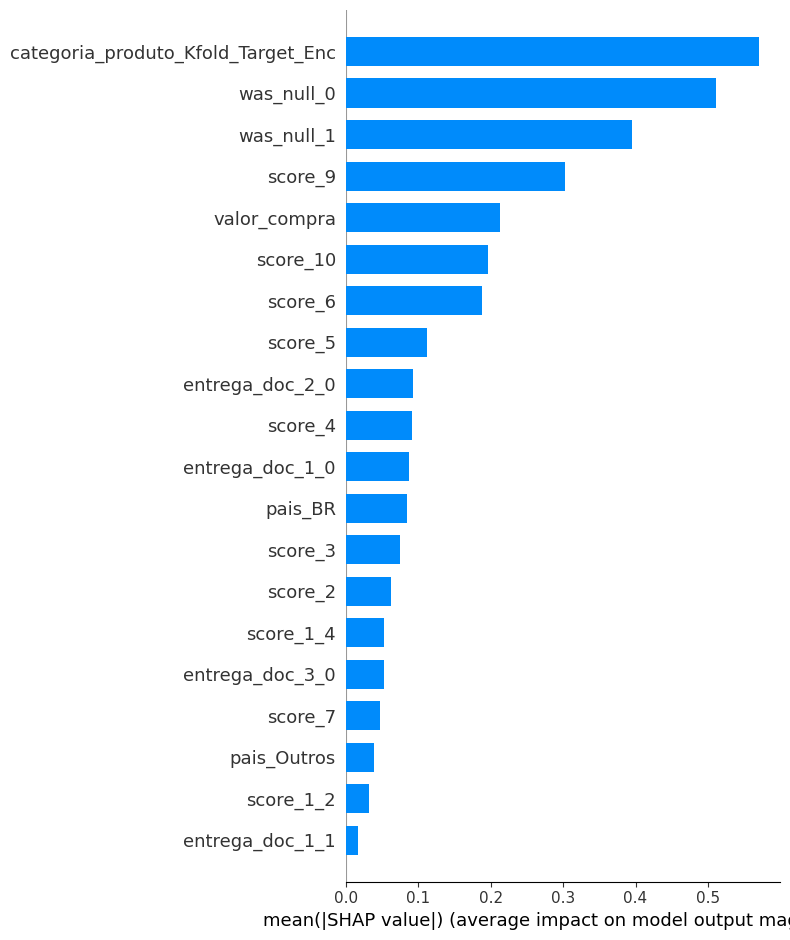

In [63]:
# Obtendo o pipeline de pr√©-processamento (sem o modelo final)
preprocessing_pipeline = Pipeline(model.steps[:-1])

# Transformando os dados de teste
X_test_transformed = preprocessing_pipeline.transform(X_test)

# Extraindo o modelo final (√∫ltimo passo do pipeline)
actual_model = model.steps[-1][1]

# Inicializando o explainer SHAP para o modelo final
explainer = shap.Explainer(actual_model)

# Calculando os valores SHAP
shap_values = explainer(X_test_transformed)

# Gr√°fico de import√¢ncia das caracter√≠sticas para o modelo
shap.summary_plot(shap_values, X_test_transformed, plot_type="bar", title="Import√¢ncia das Caracter√≠sticas")

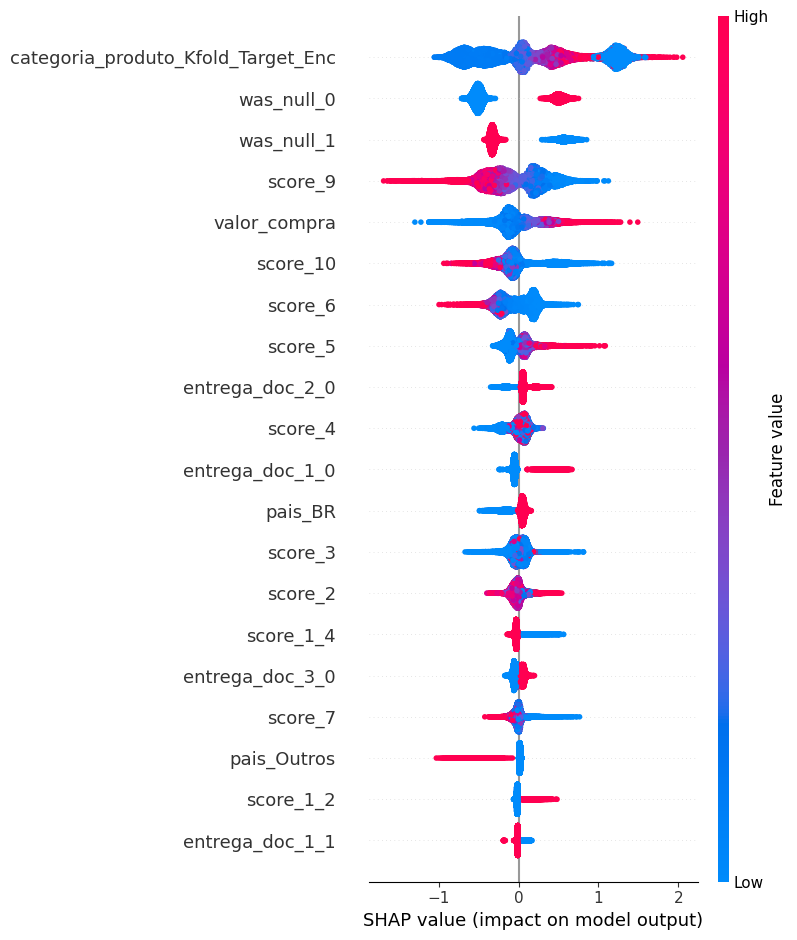

In [64]:
# Gr√°fico de dispers√£o dos valores SHAP para cada classe (fraude e n√£o fraude)
shap.summary_plot(shap_values, X_test_transformed, title="Distribui√ß√£o dos Valores SHAP")

Nos gr√°ficos SHAP apresentados, temos duas visualiza√ß√µes t√≠picas para an√°lise de impacto das vari√°veis no modelo:

1. Gr√°fico de barras (mean |SHAP value|):

Este gr√°fico mostra o impacto m√©dio de cada caracter√≠stica no modelo. O eixo vertical lista as vari√°veis, e o eixo horizontal mostra o valor m√©dio do impacto absoluto de cada vari√°vel sobre a predi√ß√£o.

As vari√°veis mais impactantes no modelo, de acordo com o gr√°fico, s√£o:
- `was_null_0`, que indica a entrega do doc 2 (determina que o registro n√£o estava nulo nesse caso), e `categoria_produto_Kfold_Target_Enc`, que √© uma codifica√ß√£o da categoria do produto, que mostrou ser um fator muito importante para a tomada de decis√£o sobre ser ou n√£o fraude;
- `score_9`, `score_6`, e `score_10` tamb√©m s√£o muito importantes;
- Outras vari√°veis como `valor_compra` e `entrega_doc_2_0` tamb√©m se destacam.

2. Gr√°fico de dispers√£o (SHAP value vs Feature value):

Esse gr√°fico mostra a distribui√ß√£o dos valores SHAP de cada vari√°vel, juntamente com a cor associada aos valores da pr√≥pria caracter√≠stica (quanto mais vermelha a cor, maior o valor da caracter√≠stica).

Vari√°veis como `was_null_0` e `categoria_produto_Kfold_Target_Enc` continuam mostrando um grande impacto no modelo. A dispers√£o ao redor do valor zero indica que estas vari√°veis t√™m um efeito tanto para predi√ß√µes de fraude quanto de n√£o fraude.

O comportamento de `score_9`, `score_6` e outras vari√°veis tamb√©m √© interessante: vari√°veis com uma grande quantidade de dispers√£o ao redor de zero sugerem que possuem um efeito balanceado no modelo, enquanto vari√°veis como `entrega_doc_2_0` mostram mais concentra√ß√£o em uma dire√ß√£o, sugerindo um impacto mais direto.

# C√°lculos Financeiros (Diferen√ßas Entre os Modelos)

In [65]:
# Convertendo a coluna 'data_compra' para o tipo datetime
df['data_compra'] = pd.to_datetime(df['data_compra'])

# Calculando a m√©dia de compras por m√™s
df['mes_ano'] = df['data_compra'].dt.to_period('M')  # Extraindo m√™s e ano
media_compras_por_mes = df.groupby('mes_ano').size().mean()

# Calculando o valor m√©dio das compras no total
media_valor_compras = df['valor_compra'].mean()

# Exibindo os resultados
print(f'M√©dia de compras por m√™s: {media_compras_por_mes}')
print(f'Valor m√©dio das compras: {media_valor_compras:.2f}')

M√©dia de compras por m√™s: 75000.0
Valor m√©dio das compras: 43.52


Conhecendo a m√©dia de compras por m√™s e o valor m√©dio dessas compras (calculando pelo total de registros no dataset), podemos fazer alguns c√°lculos para chegar no valor de lucro que o nosso modelo consegue gerar para a empresa.

In [66]:
# Calculando o total transacionado por m√™s baseado nas m√©dias calculadas
total_mensal = media_compras_por_mes * media_valor_compras

# Calculando o total de ganhos que a institui√ß√£o poderia ter caso tivesse 100% de acerto nas predi√ß√µes (10% do total mensal)
ganho_total_mensal = 0.1 * total_mensal

# Calculando o lucro real pela raz√£o de lucro do modelo antigo
lucro_modelo_antigo = 0.68 * ganho_total_mensal
# Calculando o lucro real pela raz√£o de lucro do modelo novo
lucro_modelo_novo = 0.78 * ganho_total_mensal

# Exibindo os resultados
print(f'Valor transacionado por m√™s (baseado nas m√©dias): {total_mensal:.2f}')
print(f'Poss√≠vel total de ganhos por m√™s (caso acertasse 100%): {ganho_total_mensal:.2f}')
print(f'Lucro mensal obtido pelo modelo antigo: {lucro_modelo_antigo:.2f}')
print(f'Lucro mensal obtido pelo modelo novo: {lucro_modelo_novo:.2f}')

Valor transacionado por m√™s (baseado nas m√©dias): 3264235.06
Poss√≠vel total de ganhos por m√™s (caso acertasse 100%): 326423.51
Lucro mensal obtido pelo modelo antigo: 221967.98
Lucro mensal obtido pelo modelo novo: 254610.33


# Conclus√µes Finais

Passando por todo o projeto, podemos resumir os resultados em 4 principais pontos, comparando o modelo baseline com o novo modelo treinado:

1. M√©tricas financeiras (considerando dados de teste)
- Threshold: passou de 73 para 64
- Ganhos: passou de $80330 para $88201
- Perdas: passou de $25353 para $22471
- Lucro: passou de $54977 para $65730

2. Matriz de confus√£o e taxas de fraude e aprova√ß√£o (considerando dados de teste)
- Falsos negativos: passou de 503 para 479 (diminuir esse quadrante da matriz √© especialmente importante, pois √© aquele que causa preju√≠zo dobrado para a institui√ß√£o, perdendo a comiss√£o de 10% e ainda tendo que pagar 100% do valor para o cliente)
- Taxa de fraude permaneceu a mesma (2%), enquanto a de aprova√ß√£o passou de 74% para 82%

3. M√©tricas de desempenho
- Log Loss: passou de 8.6 para 5.8 (diminuir essa m√©trica indica que o modelo est√° fazendo previs√µes melhores)
- Precis√£o: passou de 0.13 para 0.19 (indica que o novo modelo conseguiu classificar mais fraudes que realmente eram fraudes)
- Recall: passou de 0.67 para 0.69 (indica que o novo modelo conseguiu identificar melhor as fraudes que realmente eram fraudes)
- F1-score: passou de 0.22 para 0.30 (como o F1-score √© a m√©dia harm√¥nica da precis√£o e do recall, tendo aumentado ambos, essa m√©trica tamb√©m cresceu)
- ROC-AUC: passou de 0.73 para 0.85 (o novo modelo est√° conseguindo generalizar melhor, entendendo as diferen√ßas entre fraudes e n√£o fraudes)

4. O que realmente importa no fim do dia... qual o lucro a mais que foi gerado?
- Como calculado acima, considerando as m√©dias de compras por m√™s, e a m√©dia dos valores das compras, o modelo inicial, por ter uma raz√£o de lucro de 68%, conseguiria um lucro mensal de aproximadamente $221968. Enquanto o modelo novo, com uma raz√£o de lucro de 78%, conseguiria um lucro mensal de aproximadamente $254610
- Por m√™s, isso representa uma diferen√ßa de $32642, e por ano de $391704 a mais que a institui√ß√£o ir√° ganhar de lucro. Isso representa um aumento de lucros anuais em 15%.

Ou seja, o novo modelo treinado n√£o s√≥ melhora a capacidade de detec√ß√£o de compras fraudulentas, como tamb√©m aumenta consideravelmente os lucros da empresa.